<h1>
    <b>
        <p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg); font-family:camtasia; font-size:110%; color:white; text-align:center; border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">
            Project Title: Leveraging Explainable Machine Learning for Detecting and Diagnosing Liver Disease | EDA and Model
        </p>
    </b>
</h1>

### Table of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [DL Models](#6)


<a id="0"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

<center>
    <span style="font-family:Palatino; font-size:22px;">
        <i>Did you know that timely diagnosis and treatment of liver diseases can reduce the risk of severe complications and improve patient outcomes by up to <span style="color:#DC143C;">70%</span>?</i>
    </span>
</center>


<div style="text-align: center;">
    <img src="https://tafta.org.za/wp-content/uploads/2024/04/liver.jpg" alt="Liver Image" width="500" height="300" />
</div>


**Liver diseases**, particularly Fatty Liver Disease (FLD) and Hepatitis B (HBV), are critical health issues affecting millions globally. Traditional diagnostic methods can be invasive and costly, often leading to inaccuracies in detection. This thesis proposal aims to utilize explainable machine learning techniques to improve the diagnosis of liver diseases. By analyzing patient data and using SHapley Additive exPlanations (SHAP), we can identify key indicators influencing disease progression. The goal is to develop a machine learning-based system that provides accurate and interpretable predictions, enhancing the early detection and treatment of liver diseases.

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import shap

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
### DL Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Save Best Model
import pickle
# ignore warning
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
data = pd.read_csv("Liver_disease_data.csv")
data.head()

Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.087815        0            1   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  Diagnosis  
0          0.658940         0             0          42.734240          1  
1          1.670557         1             0          67.309822          1  
2          9.928308         0             0          63.738956          0  
3          5.630129         0             0          64.555873          1  
4          3.566218         1             0          77.868689          1

In [3]:
### Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 1700 Rows and 11 columns


In [4]:
### Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [5]:
### Descriptive Analysis
data.describe().transpose()

count       mean        std        min        25%  \
Age                 1700.0  50.394118  17.641915  20.000000  35.000000   
Gender              1700.0   0.504118   0.500130   0.000000   0.000000   
BMI                 1700.0  27.699801   7.210400  15.004710  21.455414   
AlcoholConsumption  1700.0   9.832309   5.757472   0.003731   4.841811   
Smoking             1700.0   0.291765   0.454708   0.000000   0.000000   
GeneticRisk         1700.0   0.521765   0.666262   0.000000   0.000000   
PhysicalActivity    1700.0   5.000993   2.847074   0.001852   2.622121   
Diabetes            1700.0   0.142353   0.349515   0.000000   0.000000   
Hypertension        1700.0   0.154706   0.361730   0.000000   0.000000   
LiverFunctionTest   1700.0  59.863867  22.996262  20.019254  40.024216   
Diagnosis           1700.0   0.550588   0.497581   0.000000   0.000000   

                          50%        75%        max  
Age                 51.000000  66.000000  80.000000  
Gender               1.000000   1.000000   1.000000  
BMI                 27.925367  33.957668  39.992845  
AlcoholConsumption   9.828195  14.871671  19.952456  
Smoking              0.000000   1.000000   1.000000  
GeneticRisk          0.000000   1.000000   2.000000  
PhysicalActivity     5.022883   7.401642   9.994964  
Diabetes             0.000000   0.000000   1.000000  
Hypertension         0.000000   0.000000   1.000000  
LiverFunctionTest   59.513146  79.428755  99.991413  
Diagnosis            1.000000   1.000000   1.000000

In [6]:
### Missing Values
data.isna().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [7]:
### Duplicated Values
data[data.duplicated()]

Empty DataFrame
Columns: [Age, Gender, BMI, AlcoholConsumption, Smoking, GeneticRisk, PhysicalActivity, Diabetes, Hypertension, LiverFunctionTest, Diagnosis]
Index: []

<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [8]:
### Age Distrbution
data.Age.value_counts().to_frame()

count
Age       
52      42
45      41
70      39
68      37
66      37
..     ...
50      21
37      21
61      20
62      18
65      18

[61 rows x 1 columns]

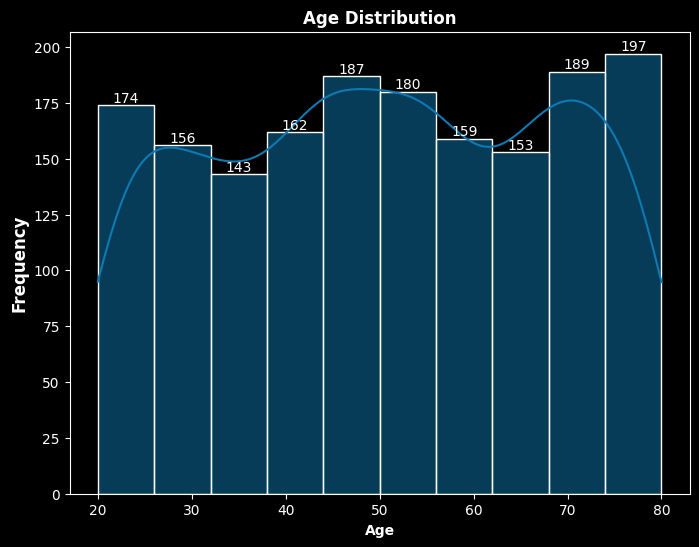

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['Age'], bins=10, kde=True, color='#0E79B2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Age Distribution', fontsize=12, weight='bold')
plt.xlabel('Age', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.show()

In [12]:
### Gender Distrbution
data.Gender.value_counts().to_frame()

count
Gender       
1         857
0         843

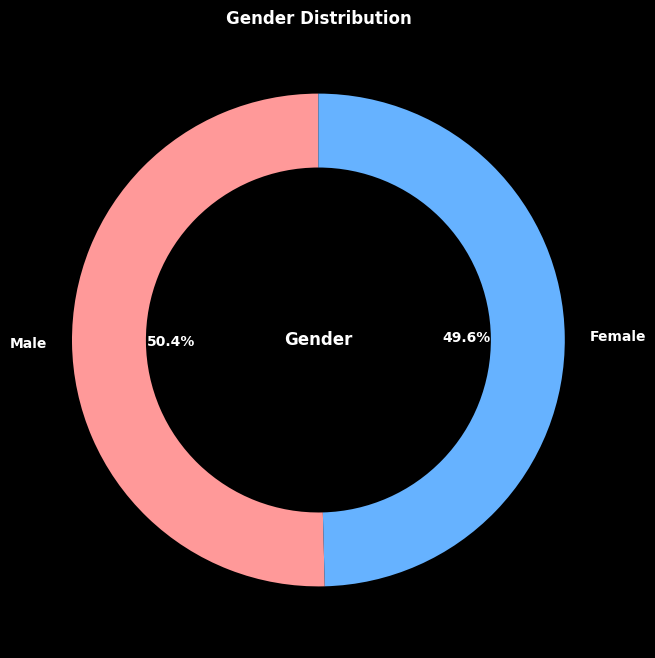

In [15]:
colors = ['#FF9999', '#66B2FF']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.Gender.value_counts(), labels=data.Gender.value_counts().index.map({0: 'Female', 1: 'Male'}), autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'Gender', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Gender Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, weight='bold', color="white")
plt.setp(texts, size=10, weight='bold', color="white")
plt.show()

In [16]:
### BMI Distrbution
min_bmi = data['BMI'].min()
max_bmi = data['BMI'].max()
# Print the results
print(f"Minimum BMI: {min_bmi}")
print(f"Maximum BMI: {max_bmi}")

Minimum BMI: 15.004709988914549
Maximum BMI: 39.99284510389785


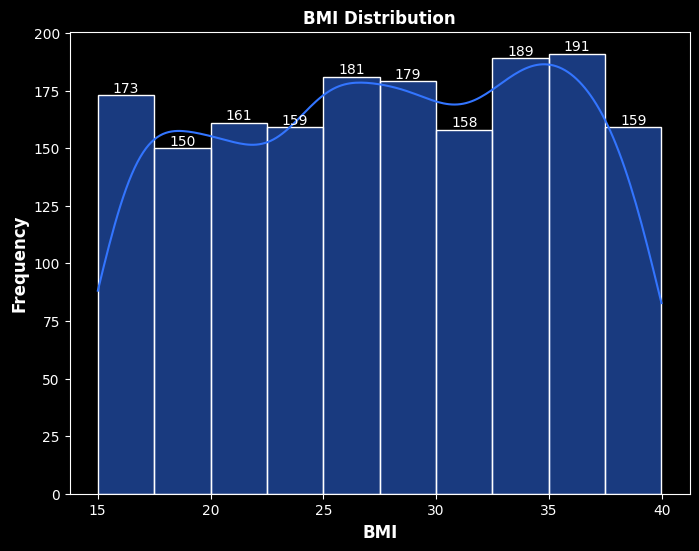

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['BMI'], bins=10, kde=True, color='#3375FF')
for container in ax.containers:
    ax.bar_label(container)
plt.title('BMI Distribution', fontsize=12, weight='bold')
plt.xlabel('BMI', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.show()

In [18]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
data['SegmentBMI'] = pd.cut(data['BMI'],bins, labels=names)
#data.drop('BMI',axis=1,inplace=True)
data.head()

Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.087815        0            1   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  Diagnosis  \
0          0.658940         0             0          42.734240          1   
1          1.670557         1             0          67.309822          1   
2          9.928308         0             0          63.738956          0   
3          5.630129         0             0          64.555873          1   
4          3.566218         1             0          77.868689          1   

       SegmentBMI  
0  Extremly Obese  
1           Obese  
2   Normal weight  
3     Underweight  
4     Underweight

In [19]:
data.SegmentBMI.value_counts().to_frame()

count
SegmentBMI           
Normal weight     400
Overweight        360
Extremly Obese    350
Obese             347
Underweight       243

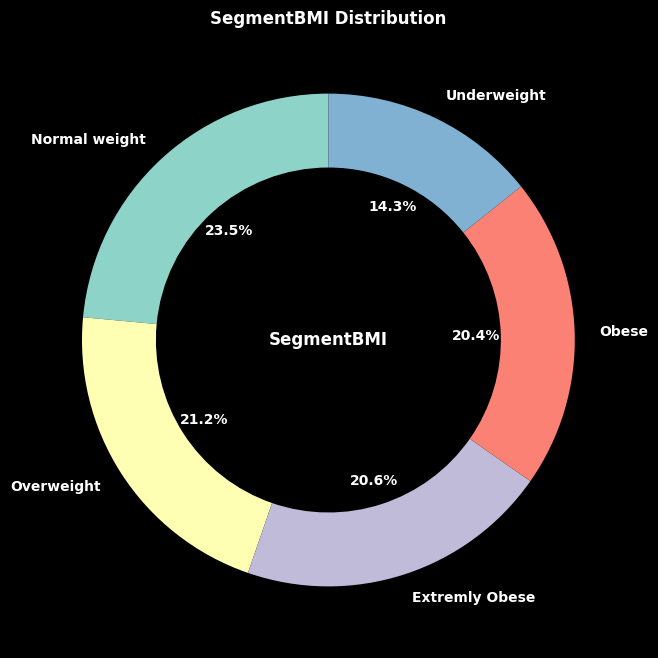

In [20]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    data.SegmentBMI.value_counts(), labels=data.SegmentBMI.value_counts().index, autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}
)
plt.text(0, 0, 'SegmentBMI', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("SegmentBMI Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [21]:
### BMI VS Gender
data.groupby(['Gender','SegmentBMI'])['SegmentBMI'].count()

Gender  SegmentBMI    
0       Underweight       126
        Normal weight     206
        Overweight        168
        Obese             162
        Extremly Obese    181
1       Underweight       117
        Normal weight     194
        Overweight        192
        Obese             185
        Extremly Obese    169
Name: SegmentBMI, dtype: int64

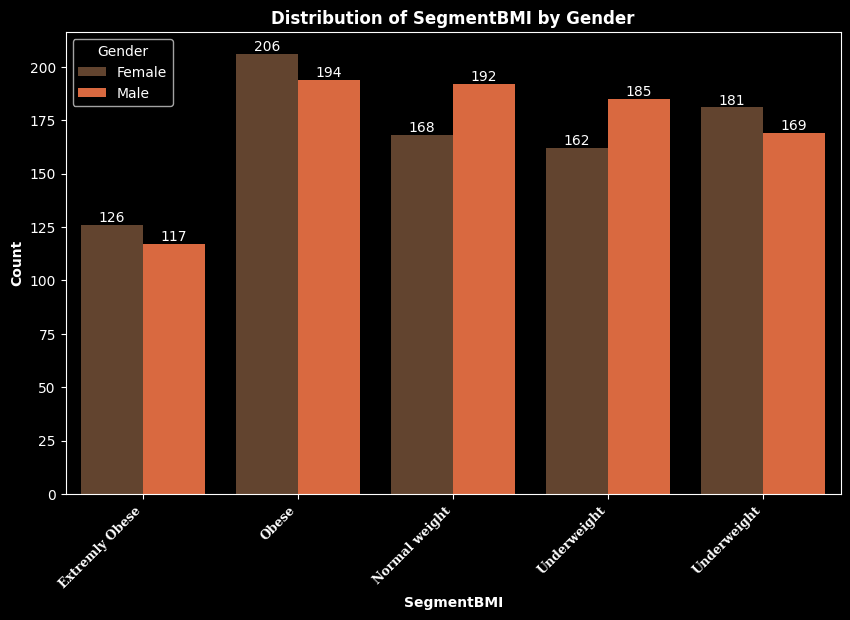

In [28]:
data2 = data.copy()
data2.Gender = data2.Gender.map({0: 'Female', 1: 'Male'})
grouped_data = data2.groupby(['Gender', 'SegmentBMI'])['SegmentBMI'].count().reset_index(name='Count')
colors = ['#6B4226','#F25D27']
font_properties = {'fontsize': 9, 'fontweight': 'bold', 'family': 'serif'}
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='SegmentBMI', y='Count', hue='Gender',palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of SegmentBMI by Gender", fontsize=12, weight='bold')
plt.xlabel("SegmentBMI", fontsize=10, weight='bold')
plt.ylabel("Count", fontsize=10, weight='bold')
plt.legend(title="Gender")
plt.xticks(rotation=45,ha="right")
ax.set_xticklabels(data.SegmentBMI, fontdict=font_properties)
plt.show()

In [29]:
### AlcoholConsumption Distrbution
min_alcohol = data['AlcoholConsumption'].min()
max_alcohol = data['AlcoholConsumption'].max()
# Print the results
print(f"Minimum AlcoholConsumption: {min_alcohol}")
print(f"Maximum AlcoholConsumption: {max_alcohol}")

Minimum AlcoholConsumption: 0.0037305634132622
Maximum AlcoholConsumption: 19.952456445027707


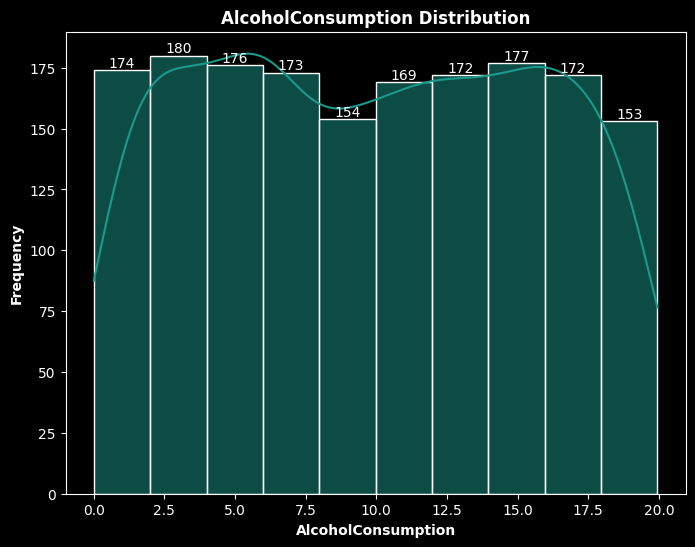

In [33]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['AlcoholConsumption'], bins=10, kde=True, color='#1B998B')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AlcoholConsumption Distribution', fontsize=12, weight='bold')
plt.xlabel('AlcoholConsumption', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
plt.show()

In [31]:
### Average AlcoholConsumption VS Gender
pivot = pd.pivot_table(data, values="AlcoholConsumption", index="Gender", aggfunc='mean')
pivot

AlcoholConsumption
Gender                    
0                 9.851531
1                 9.813402

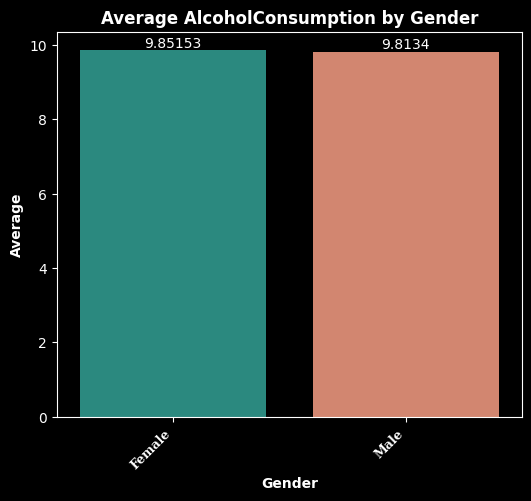

In [34]:
pivot1 = pivot.reset_index()
pivot1['Gender'] = pivot1['Gender'].map({0: 'Female', 1: 'Male'})
colors = ['#1B998B','#E27D60']
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=pivot1["Gender"], y=pivot1["AlcoholConsumption"], palette=colors)
ax.set_title("Average AlcoholConsumption by Gender", fontsize=12, weight='bold', color="white")
ax.set_xlabel("Gender", fontsize=10, weight='bold', color="white")
ax.set_ylabel("Average", fontsize=10, weight='bold', color="white")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(["Female","Male"], fontdict=font_properties)
plt.show()

In [35]:
### Smoking Distrbution
data.Smoking.value_counts().to_frame()

count
Smoking       
0         1204
1          496

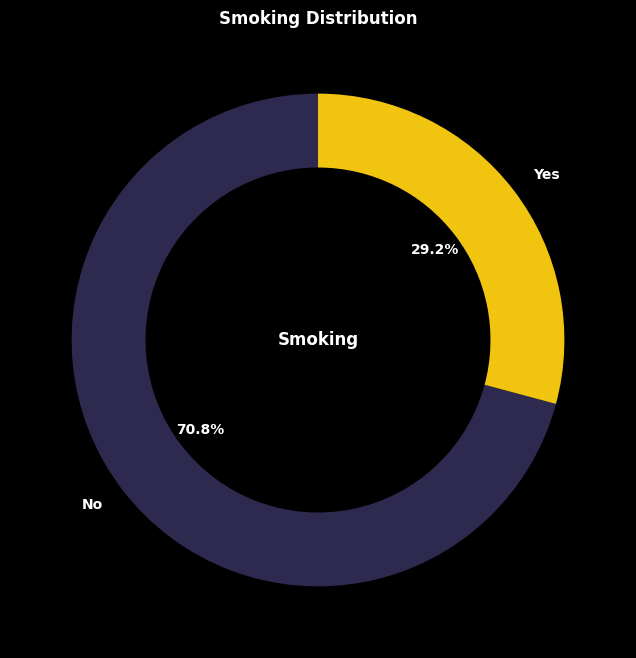

In [36]:
colors = ['#2E294E', '#f1c40f']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.Smoking.value_counts(), labels=data.Smoking.value_counts().index.map({0: 'No', 1: 'Yes'}), autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'Smoking', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Smoking Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [37]:
### Smoking VS Gender
data.groupby(['Gender','Smoking'])['Smoking'].count()

Gender  Smoking
0       0          588
        1          255
1       0          616
        1          241
Name: Smoking, dtype: int64

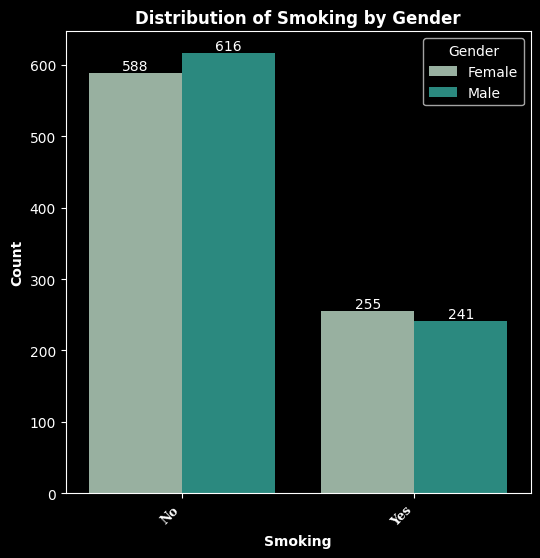

In [38]:
data2 = data.copy()
data2.Gender = data2.Gender.map({0: 'Female', 1: 'Male'})
data2.Smoking = data2.Smoking.map({0: 'No', 1: 'Yes'})
grouped_data = data2.groupby(['Smoking', 'Gender'])['Smoking'].count().reset_index(name='Count')
colors = ['#94B49F','#1B998B']
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=grouped_data, x='Smoking', y='Count', hue='Gender',palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of Smoking by Gender", fontsize=12, weight='bold')
plt.xlabel("Smoking", fontsize=10, weight='bold')
plt.ylabel("Count", fontsize=10, weight='bold')
plt.legend(title="Gender")
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(["No","Yes"], fontdict=font_properties)
plt.show()

In [39]:
### GeneticRisk Distrbution
data.GeneticRisk.value_counts().to_frame()

count
GeneticRisk       
0              978
1              557
2              165

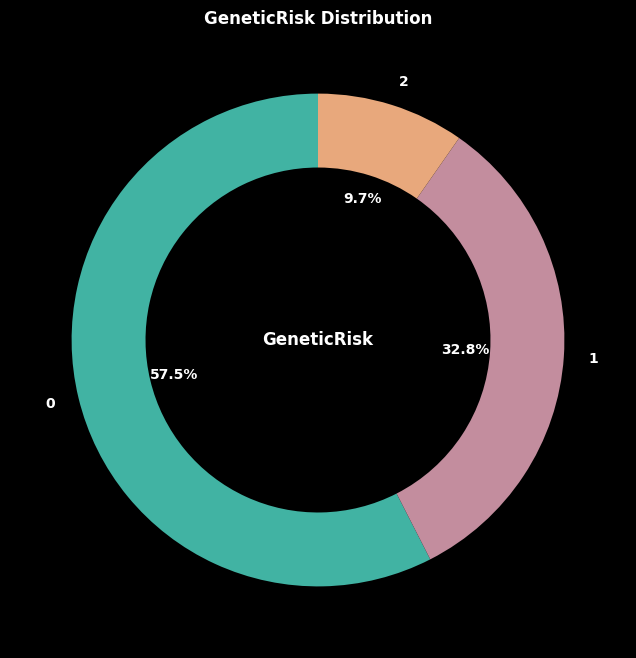

In [40]:
colors = ['#41B3A3', '#C38D9E','#E8A87C']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.GeneticRisk.value_counts(), labels=data.GeneticRisk.value_counts().index, autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'GeneticRisk', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("GeneticRisk Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [41]:
### GeneticRisk VS Gender
data.groupby(['Gender','GeneticRisk'])['GeneticRisk'].count()

Gender  GeneticRisk
0       0              491
        1              274
        2               78
1       0              487
        1              283
        2               87
Name: GeneticRisk, dtype: int64

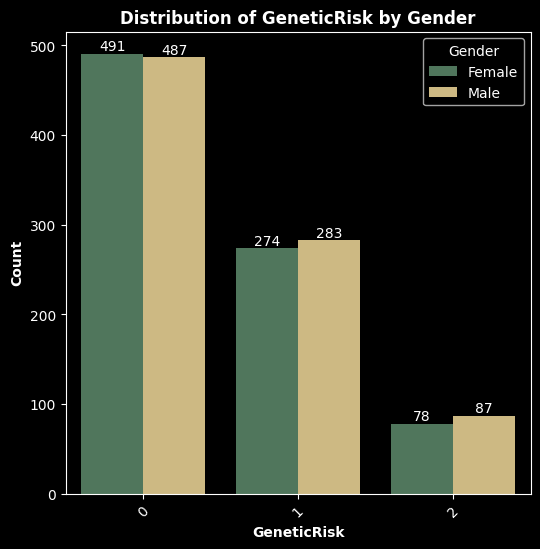

In [47]:
data2 = data.copy()
data2.Gender = data2.Gender.map({0: 'Female', 1: 'Male'})
grouped_data = data2.groupby(['GeneticRisk', 'Gender'])['GeneticRisk'].count().reset_index(name='Count')
colors = ['#4A7C59','#D9BF77']
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=grouped_data, x='GeneticRisk', y='Count', hue='Gender',palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of GeneticRisk by Gender", fontsize=12, weight='bold')
plt.xlabel("GeneticRisk", fontsize=10, weight='bold')
plt.ylabel("Count", fontsize=10, weight='bold')
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

In [31]:
### PhysicalActivity Distrbution
min_phy = data['PhysicalActivity'].min()
max_phy = data['PhysicalActivity'].max()
# Print the results
print(f"Minimum PhysicalActivity: {min_phy}")
print(f"Maximum PhysicalActivity: {max_phy}")

Minimum PhysicalActivity: 0.001851952954428
Maximum PhysicalActivity: 9.994963504187217


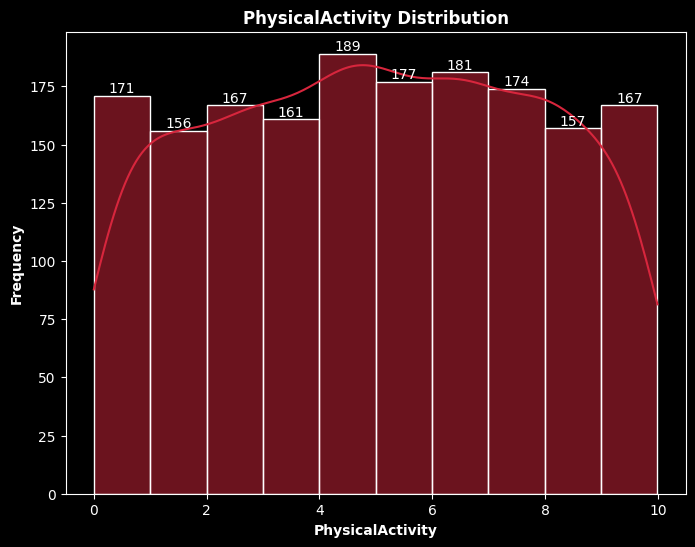

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['PhysicalActivity'], bins=10, kde=True, color='#D7263D')
for container in ax.containers:
    ax.bar_label(container)
plt.title('PhysicalActivity Distribution', fontsize=12, weight='bold')
plt.xlabel('PhysicalActivity', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
plt.show()

In [49]:
### Average PhysicalActivity VS Gender
pivot = pd.pivot_table(data, values="PhysicalActivity", index="Gender", aggfunc='mean')
pivot

PhysicalActivity
Gender                  
0               4.974077
1               5.027470

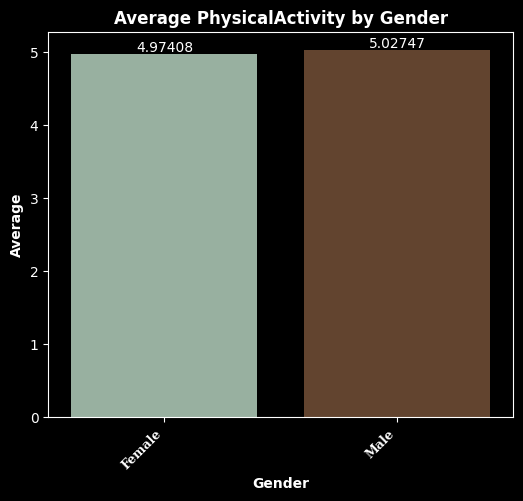

In [50]:
pivot1 = pivot.reset_index()
pivot1['Gender'] = pivot1['Gender'].map({0: 'Female', 1: 'Male'})
colors = ['#94B49F','#6B4226']
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=pivot1["Gender"], y=pivot1["PhysicalActivity"], palette=colors)
ax.set_title("Average PhysicalActivity by Gender", fontsize=12, weight='bold', color="white")
ax.set_xlabel("Gender", fontsize=10, weight='bold', color="white")
ax.set_ylabel("Average", fontsize=10, weight='bold', color="white")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(["Female","Male"], fontdict=font_properties)
plt.show()

In [52]:
### Diabetes Distrbution
data.Diabetes.value_counts().to_frame()

count
Diabetes       
0          1458
1           242

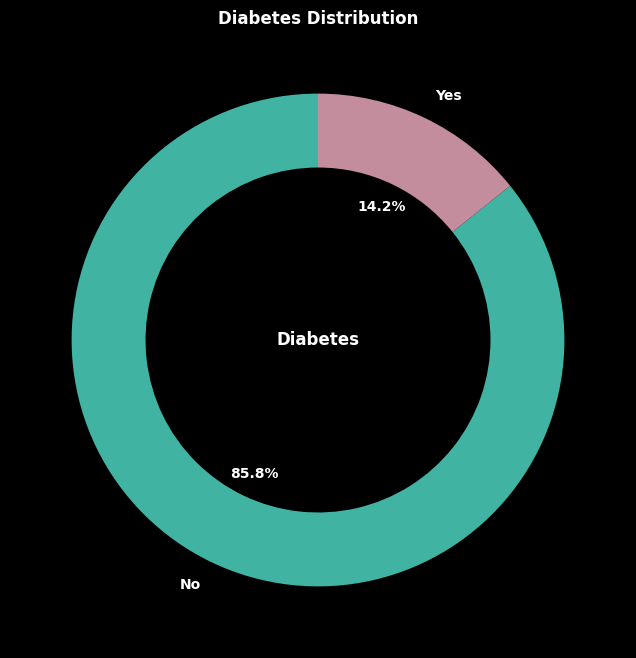

In [53]:
colors = ['#41B3A3', '#C38D9E']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.Diabetes.value_counts(), labels=data.Diabetes.value_counts().index.map({0:'No',1:'Yes'}), autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'Diabetes', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Diabetes Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [54]:
### Diabetes VS Gender
data.groupby(['Gender','Diabetes'])['Diabetes'].count()

Gender  Diabetes
0       0           723
        1           120
1       0           735
        1           122
Name: Diabetes, dtype: int64

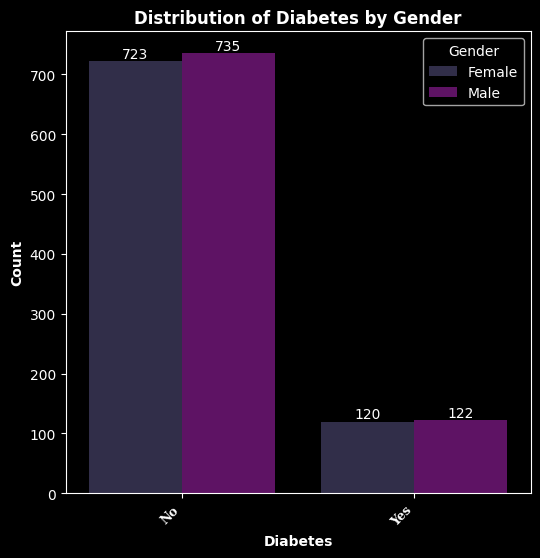

In [55]:
data2 = data.copy()
data2.Gender = data2.Gender.map({0: 'Female', 1: 'Male'})
data2.Diabetes = data2.Diabetes.map({0: 'No', 1: 'Yes'})
grouped_data = data2.groupby(['Diabetes', 'Gender'])['Diabetes'].count().reset_index(name='Count')
colors = ['#2E294E','#6A0572']
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=grouped_data, x='Diabetes', y='Count', hue='Gender',palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of Diabetes by Gender", fontsize=12, weight='bold')
plt.xlabel("Diabetes", fontsize=10, weight='bold')
plt.ylabel("Count", fontsize=10, weight='bold')
plt.legend(title="Gender")
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(["No","Yes"], fontdict=font_properties)
plt.show()

In [56]:
### Hypertension Distrbution
data.Hypertension.value_counts().to_frame()

count
Hypertension       
0              1437
1               263

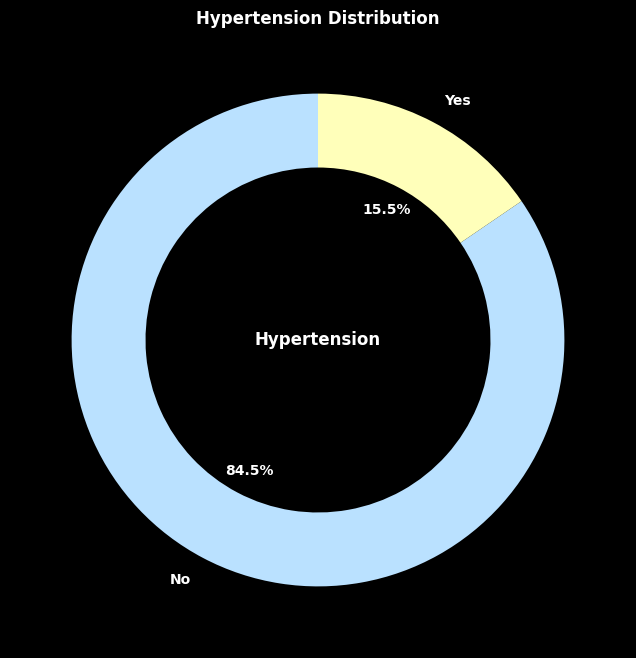

In [57]:
colors = ['#BAE1FF', '#FFFFBA']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.Hypertension.value_counts(), labels=data.Hypertension.value_counts().index.map({0:'No',1:'Yes'}), autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'Hypertension', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Hypertension Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

In [58]:
### Hypertension VS Gender
data.groupby(['Gender','Hypertension'])['Hypertension'].count()

Gender  Hypertension
0       0               720
        1               123
1       0               717
        1               140
Name: Hypertension, dtype: int64

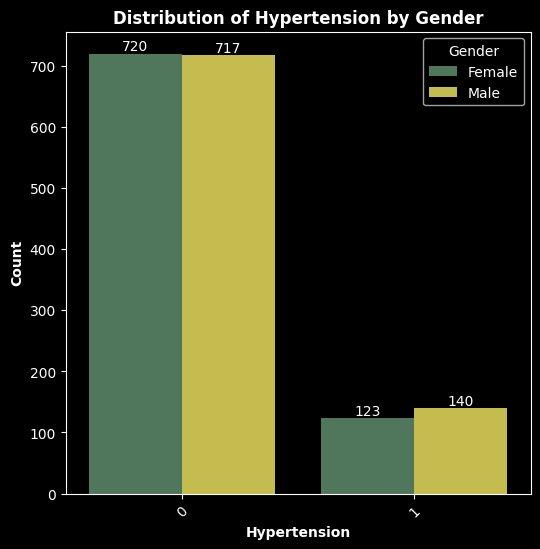

In [59]:
data2 = data.copy()
data2.Gender = data2.Gender.map({0: 'Female', 1: 'Male'})
data2.Diabetes = data2.Hypertension.map({0: 'No', 1: 'Yes'})
grouped_data = data2.groupby(['Hypertension', 'Gender'])['Hypertension'].count().reset_index(name='Count')
colors = ['#4A7C59','#D9CC3C']
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=grouped_data, x='Hypertension', y='Count', hue='Gender',palette=colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of Hypertension by Gender", fontsize=12, weight='bold')
plt.xlabel("Hypertension", fontsize=10, weight='bold')
plt.ylabel("Count", fontsize=10, weight='bold')
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

In [60]:
### LiverFunctionTest Distrbution
min_liver = data['LiverFunctionTest'].min()
max_liver = data['LiverFunctionTest'].max()
# Print the results
print(f"Minimum LiverFunctionTest: {min_liver}")
print(f"Maximum LiverFunctionTest: {max_liver}")

Minimum LiverFunctionTest: 20.01925357943218
Maximum LiverFunctionTest: 99.99141333640394


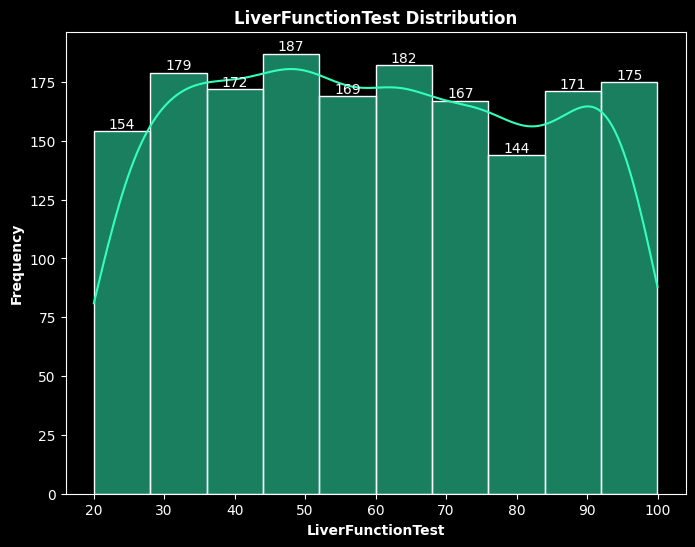

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data['LiverFunctionTest'], bins=10, kde=True, color='#33FFBD')
for container in ax.containers:
    ax.bar_label(container)
plt.title('LiverFunctionTest Distribution', fontsize=12, weight='bold')
plt.xlabel('LiverFunctionTest', fontsize=10, weight='bold')
plt.ylabel('Frequency', fontsize=10, weight='bold')
plt.show()

In [62]:
### Diagnosis Distrbution
data.Diagnosis.value_counts().to_frame()

count
Diagnosis       
1            936
0            764

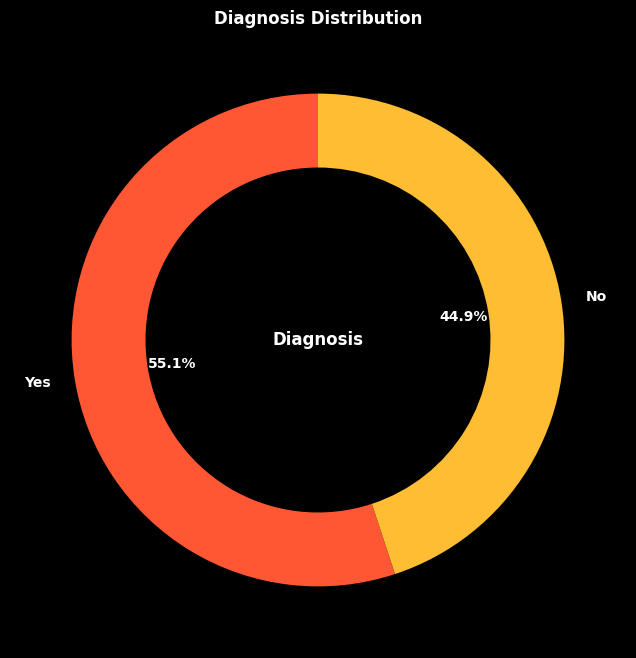

In [63]:
colors = ['#FF5733', '#FFBD33']
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    data.Diagnosis.value_counts(), labels=data.Diagnosis.value_counts().index.map({0:'No',1:'Yes'}), autopct='%1.1f%%', startangle=90, 
    wedgeprops={'width': 0.3}, colors=colors
)
plt.text(0, 0, 'Diagnosis', ha='center', va='center', fontsize=12, fontweight='bold')
plt.title("Diagnosis Distribution", fontsize=12, weight='bold')
plt.setp(autotexts, size=10, color="white", weight='bold')
plt.setp(texts, size=10, color="white", weight='bold')
plt.show()

<center><span style="font-family:Palatino; font-size:22px;"><i> Graph Show  <span style="color:#DC143C;">Dataset</span> Almost Balanced</i></span> </center>


In [64]:
### Show Columns VS Diagnosis 
columns = data.select_dtypes(include=['category','int']).columns
columns = list(columns[1:])
columns.pop(-2)
columns

['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension', 'SegmentBMI']

In [65]:
for col in columns:
    print(f'{col} VS Diagnosis\n')
    print(data.groupby(['Diagnosis',col])[col].count())
    print('\n****************************************\n')

Gender VS Diagnosis

Diagnosis  Gender
0          0         459
           1         305
1          0         384
           1         552
Name: Gender, dtype: int64

****************************************

Smoking VS Diagnosis

Diagnosis  Smoking
0          0          618
           1          146
1          0          586
           1          350
Name: Smoking, dtype: int64

****************************************

GeneticRisk VS Diagnosis

Diagnosis  GeneticRisk
0          0              459
           1              278
           2               27
1          0              519
           1              279
           2              138
Name: GeneticRisk, dtype: int64

****************************************

Diabetes VS Diagnosis

Diagnosis  Diabetes
0          0           687
           1            77
1          0           771
           1           165
Name: Diabetes, dtype: int64

****************************************

Hypertension VS Diagnosis

Diagnosis  Hypertensi

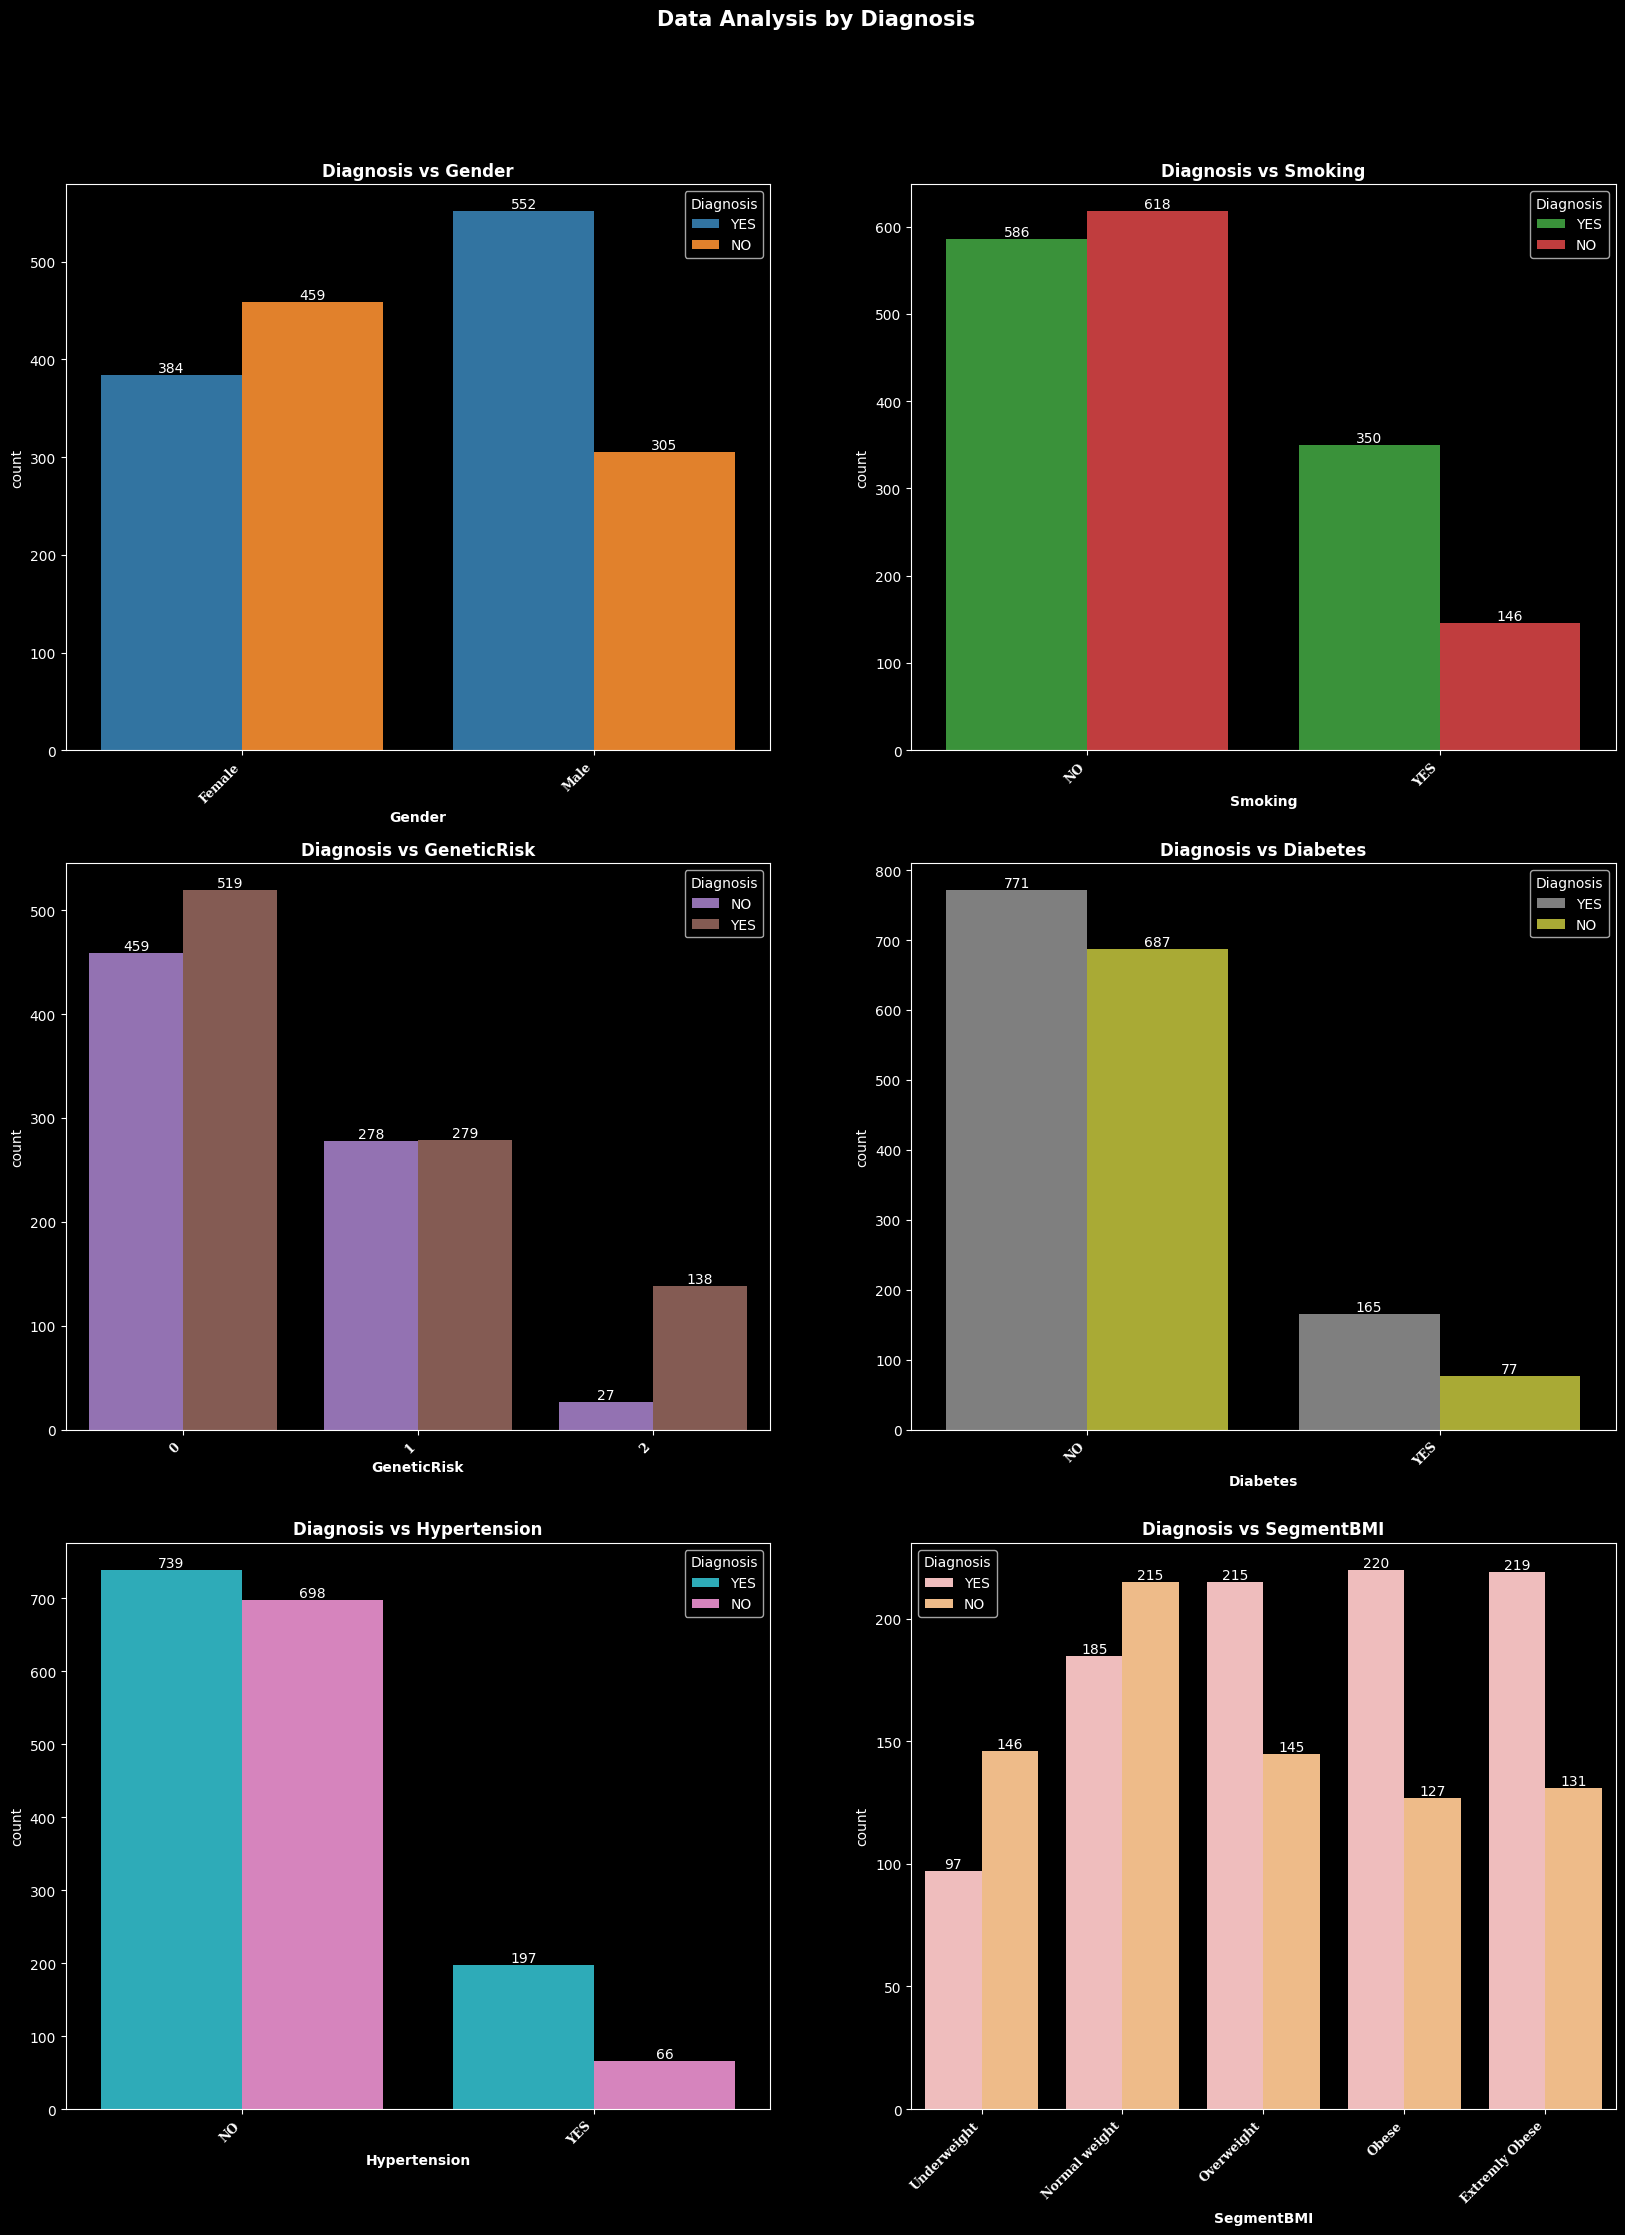

In [90]:
data1 = data[columns].copy()
data1['Gender'] = data1['Gender'].map({0: 'Female', 1: 'Male'})
data1['Smoking'] = data1['Smoking'].map({0: 'NO', 1: 'YES'})
data1['Diabetes'] = data1['Diabetes'].map({0: 'NO', 1: 'YES'})
data1['Hypertension'] = data1['Hypertension'].map({0: 'NO', 1: 'YES'})
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
axes = axes.flatten()
colors = [
    ['#1f77b4', '#ff7f0e'],  
    ['#2ca02c', '#d62728'], 
    ['#9467bd', '#8c564b'], 
    ['#7f7f7f', '#bcbd22'], 
    ['#17becf', '#e377c2'],  
    ['#f7b5b5', '#ffbb78']   
]
for i, col in enumerate(columns):
    ax = sns.countplot(
        x=data1[col],
        hue=data['Diagnosis'].map({0: 'NO', 1: 'YES'}),
        ax=axes[i],
        palette=colors[i]
    )
    ax.set_title(f'Diagnosis vs {col}', fontsize=12, weight='bold')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(col, fontsize=10, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontdict=font_properties)
fig.suptitle('Data Analysis by Diagnosis', fontsize=15, weight='bold', y=0.95)
plt.show()

In [91]:
### Check Outliers Values for Numerical Columns
columns = list(data.select_dtypes(include='float64').columns)
columns.append('Age')
columns

['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest', 'Age']

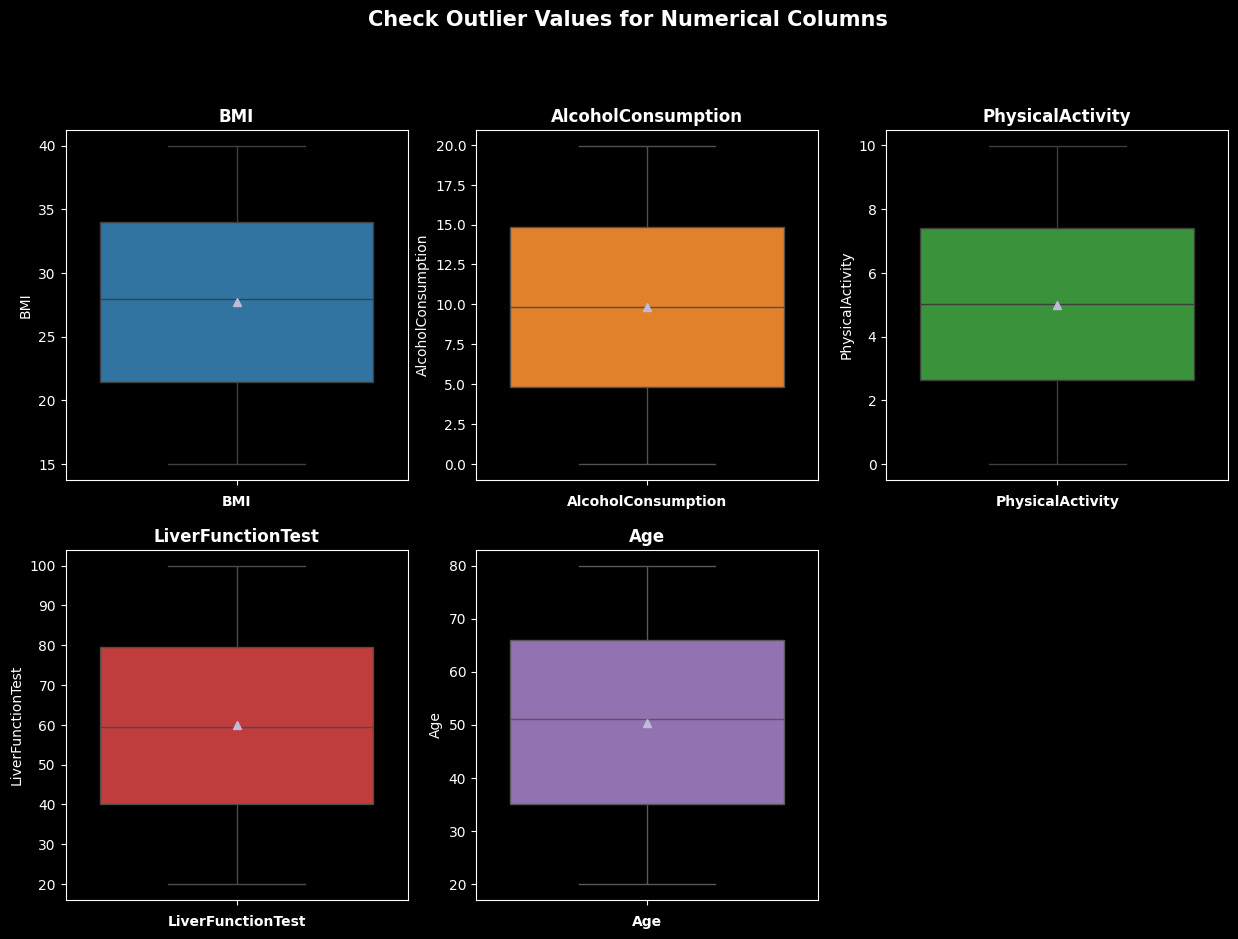

In [94]:
plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, column in enumerate(columns):
    plt.subplot(2, 3, i + 1) 
    sns.boxplot(y=data[column], color=colors[i], showmeans=True)
    plt.title(column, fontsize=12, weight='bold')
    plt.xlabel(column, fontsize=10, weight='bold')
plt.suptitle("Check Outlier Values for Numerical Columns", fontsize=15, weight='bold', y=1)
plt.show()

<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [95]:
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['SegmentBMI'], dtype='object')

In [96]:
### Transform Object Columns into Numbers
label = LabelEncoder()
data.SegmentBMI = label.fit_transform(data.SegmentBMI)
data.head()

Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.087815        0            1   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  Diagnosis  \
0          0.658940         0             0          42.734240          1   
1          1.670557         1             0          67.309822          1   
2          9.928308         0             0          63.738956          0   
3          5.630129         0             0          64.555873          1   
4          3.566218         1             0          77.868689          1   

   SegmentBMI  
0           0  
1           2  
2           1  
3           4  
4           4

In [97]:
### Show Correlation
corr = data.corr()
corr

Age    Gender       BMI  AlcoholConsumption  \
Age                 1.000000 -0.009323  0.038283            0.008236   
Gender             -0.009323  1.000000  0.013458           -0.003312   
BMI                 0.038283  0.013458  1.000000           -0.024749   
AlcoholConsumption  0.008236 -0.003312 -0.024749            1.000000   
Smoking            -0.013683 -0.023403 -0.018322           -0.013794   
GeneticRisk        -0.012948  0.017394 -0.007686           -0.016808   
PhysicalActivity   -0.015212  0.009379 -0.010888           -0.024232   
Diabetes            0.024209  0.000012 -0.007808            0.013490   
Hypertension        0.000678  0.024131 -0.004850            0.016640   
LiverFunctionTest  -0.013105  0.024603  0.043684           -0.043480   
Diagnosis           0.156099  0.189558  0.167655            0.349610   
SegmentBMI         -0.023162  0.019226 -0.596641            0.015214   

                     Smoking  GeneticRisk  PhysicalActivity  Diabetes  \
Age                -0.013683    -0.012948         -0.015212  0.024209   
Gender             -0.023403     0.017394          0.009379  0.000012   
BMI                -0.018322    -0.007686         -0.010888 -0.007808   
AlcoholConsumption -0.013794    -0.016808         -0.024232  0.013490   
Smoking             1.000000    -0.007374          0.007054  0.001455   
GeneticRisk        -0.007374     1.000000         -0.011594 -0.010785   
PhysicalActivity    0.007054    -0.011594          1.000000 -0.006939   
Diabetes            0.001455    -0.010785         -0.006939  1.000000   
Hypertension        0.040314     0.018990          0.018569  0.049166   
LiverFunctionTest   0.000838    -0.008061         -0.010393  0.018153   
Diagnosis           0.200071     0.118292         -0.116689  0.107480   
SegmentBMI          0.005859     0.000346          0.021407 -0.043479   

                    Hypertension  LiverFunctionTest  Diagnosis  SegmentBMI  
Age                     0.000678          -0.013105   0.156099   -0.023162  
Gender                  0.024131           0.024603   0.189558    0.019226  
BMI                    -0.004850           0.043684   0.167655   -0.596641  
AlcoholConsumption      0.016640          -0.043480   0.349610    0.015214  
Smoking                 0.040314           0.000838   0.200071    0.005859  
GeneticRisk             0.018990          -0.008061   0.118292    0.000346  
PhysicalActivity        0.018569          -0.010393  -0.116689    0.021407  
Diabetes                0.049166           0.018153   0.107480   -0.043479  
Hypertension            1.000000           0.007847   0.170683   -0.004467  
LiverFunctionTest       0.007847           1.000000   0.354003   -0.043639  
Diagnosis               0.170683           0.354003   1.000000   -0.064997  
SegmentBMI             -0.004467          -0.043639  -0.064997    1.000000

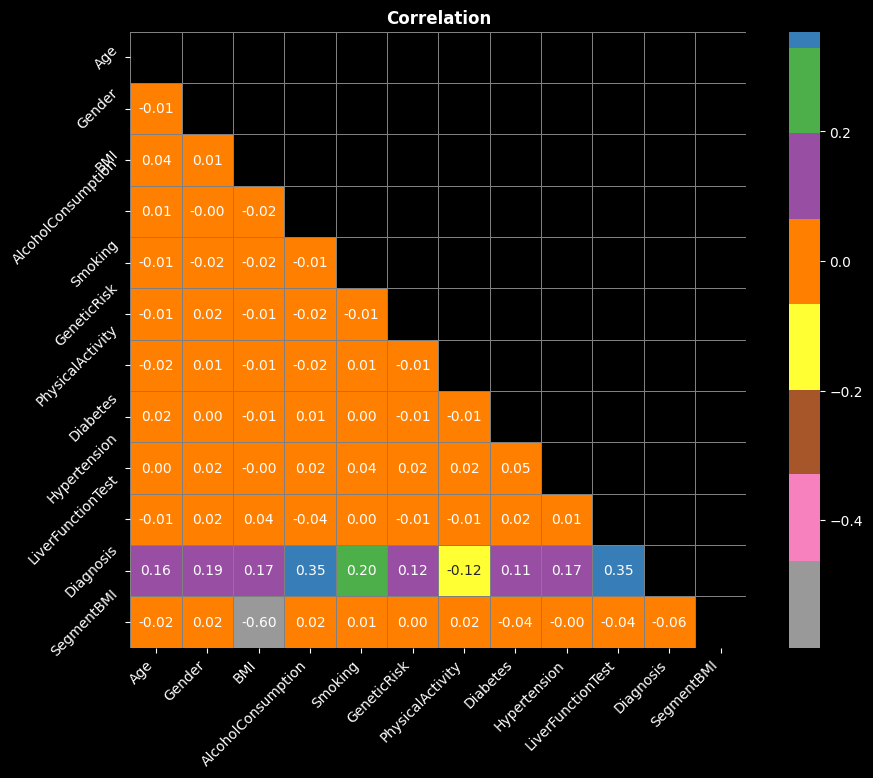

In [98]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Set1_r', 
            cbar=True, square=True, linewidths=0.5, 
            linecolor='gray', center=0)
plt.title('Correlation', fontsize=12, weight='bold')
plt.yticks(rotation=45, ha='right') 
plt.xticks(rotation=45, ha='right') 
ax.set_xticks(range(len(data.columns))) 
ax.set_yticks(range(len(data.columns))) 
ax.set_xticklabels(data.columns, fontdict=font_properties)
ax.set_yticklabels(data.columns, fontdict=font_properties)
plt.show()

In [99]:
diag_corr = corr['Diagnosis'].drop('Diagnosis')
diag_corr

Age                   0.156099
Gender                0.189558
BMI                   0.167655
AlcoholConsumption    0.349610
Smoking               0.200071
GeneticRisk           0.118292
PhysicalActivity     -0.116689
Diabetes              0.107480
Hypertension          0.170683
LiverFunctionTest     0.354003
SegmentBMI           -0.064997
Name: Diagnosis, dtype: float64

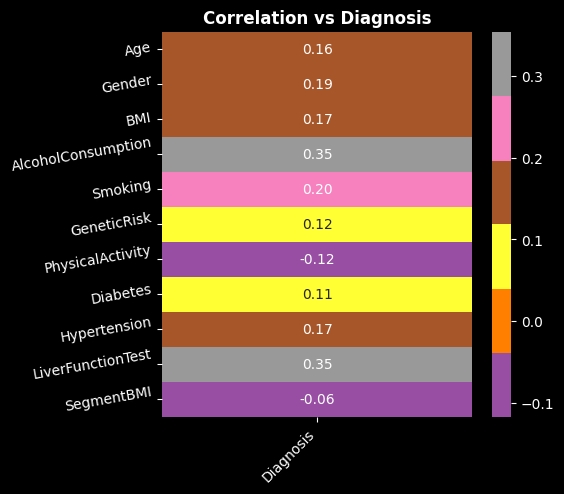

In [109]:
plt.figure(figsize=(5, 5))
diag_corr_df = pd.DataFrame(diag_corr)
sns.heatmap(diag_corr_df, annot=True, fmt=".2f", cmap='Set1', 
            linecolor='gray', center=0)
plt.title('Correlation vs Diagnosis', fontsize=12, weight='bold')
plt.yticks(rotation=10, ha='right') 
plt.xticks(rotation=45, ha='right') 
ax.set_yticklabels(data.columns, fontdict=font_properties)
plt.show()

In [110]:
### Split 
X = data.drop(['Diagnosis','SegmentBMI'],axis=1)
y = data['Diagnosis']
keys = X.columns
X.head()

Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.087815        0            1   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  
0          0.658940         0             0          42.734240  
1          1.670557         1             0          67.309822  
2          9.928308         0             0          63.738956  
3          5.630129         0             0          64.555873  
4          3.566218         1             0          77.868689

In [111]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Diagnosis, dtype: int64

In [112]:
### Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

Age  Gender       BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0  0.633333     0.0  0.834511            0.865674      0.0          0.5   
1  0.850000     1.0  0.629409            0.110159      0.0          0.5   
2  0.466667     0.0  0.198762            0.927238      0.0          0.0   
3  0.233333     1.0  0.064459            0.633080      0.0          0.0   
4  0.700000     1.0  0.042465            0.054344      0.0          0.5   

   PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  
0          0.065754       0.0           0.0           0.284036  
1          0.166986       1.0           0.0           0.591338  
2          0.993330       0.0           0.0           0.546687  
3          0.563216       0.0           0.0           0.556902  
4          0.356682       1.0           0.0           0.723370

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1360, 10)
X_test shape is  (340, 10)
y_train shape is  (1360,)
y_test shape is  (340,)


<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [62]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True,random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.8831
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.8904
Cross-validating LGBM...
Mean accuracy for LGBM: 0.8868
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.8279
Cross-validating KNN...
Mean accuracy for KNN: 0.7941
Cross-validating SVC...
Mean accuracy for SVC: 0.8360
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.8221
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9140
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8949
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8904
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.8015


In [63]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

Model  Mean Accuracy
7             CatBoost       0.913971
8     GradientBoosting       0.894853
1              XGBoost       0.890441
9             AdaBoost       0.890441
2                 LGBM       0.886765
0         RandomForest       0.883088
5                  SVC       0.836029
3         DecisionTree       0.827941
6   LogisticRegression       0.822059
10          NaiveBayes       0.801471
4                  KNN       0.794118

In [64]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: CatBoost


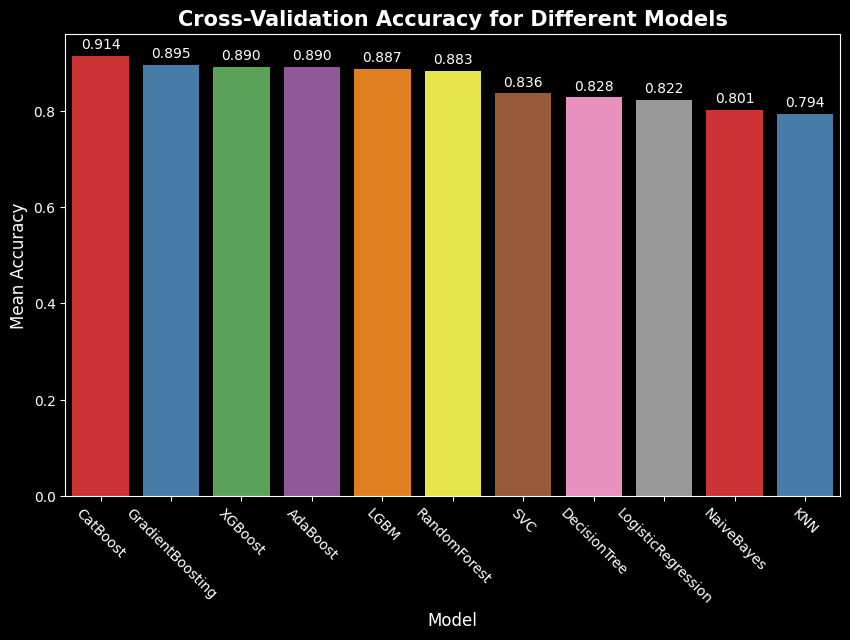

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette='Set1')
ax.set_title('Cross-Validation Accuracy for Different Models', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Mean Accuracy', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(cv_results_df.Model, fontdict=font_properties)
plt.show()

In [66]:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 10, 20, 30, 40],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'depth': [6, 10, 15, 20, 25, 30, 40]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'max_depth': [None, 10, 20, 30, 40]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1]
    },
    'NaiveBayes': {}
}

best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")



Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for RandomForest: 0.8860

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.9059

Performing GridSearchCV for LGBM...

Best parameters for LGBM: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score for LGBM: 0.8956

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 10}
Best cross-validation score for DecisionTree: 0.8382

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNN: 0.8000

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Bes

In [67]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

Model  Best Score  \
7             CatBoost    0.923529   
9             AdaBoost    0.911765   
1              XGBoost    0.905882   
2                 LGBM    0.895588   
0         RandomForest    0.886029   
8     GradientBoosting    0.884559   
3         DecisionTree    0.838235   
5                  SVC    0.836029   
6   LogisticRegression    0.822794   
10          NaiveBayes    0.801471   
4                  KNN    0.800000   

                                          Best Params  
7   {'depth': 10, 'iterations': 100, 'learning_rat...  
9         {'learning_rate': 0.1, 'n_estimators': 200}  
1   {'learning_rate': 0.05, 'max_depth': 3, 'n_est...  
2   {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
0   {'max_depth': None, 'min_samples_split': 5, 'n...  
8   {'learning_rate': 1, 'max_depth': 10, 'n_estim...  
3        {'max_depth': None, 'min_samples_split': 10}  
5         {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}  
6    {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}  
10                                                 {}  
4           {'n_neighbors': 7, 'weights': 'distance'}

In [68]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : CatBoost

Best Parameters : {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


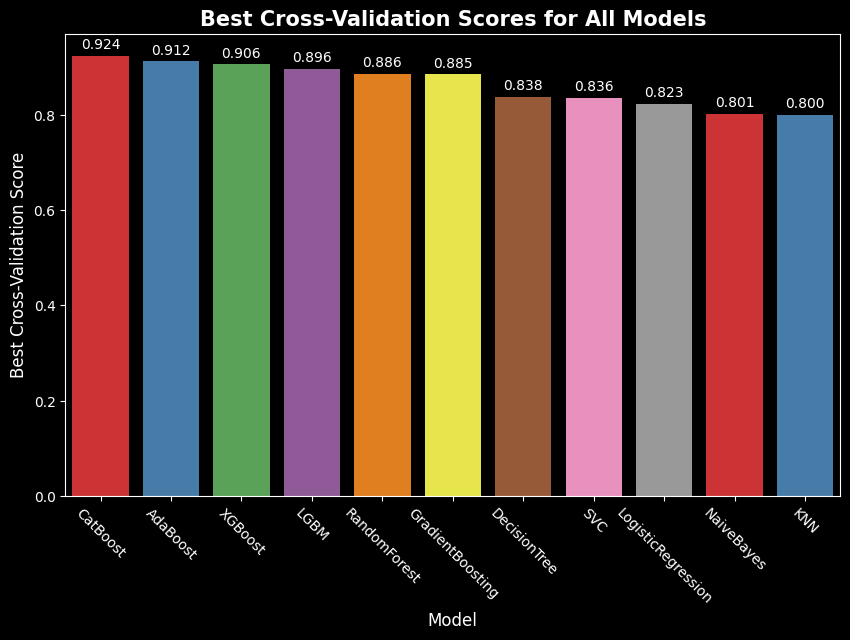

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=best_results_df, x='Model', y='Best Score', palette='Set1')
ax.set_title('Best Cross-Validation Scores for All Models', fontsize=12, weight='bold', loc='center')
ax.set_xlabel('Models', fontsize=10, weight='bold')
ax.set_ylabel('Best Cross-Validation Score', fontsize=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.3f}' for v in container], padding=3)
plt.xticks(rotation=45,ha='right') 
ax.set_xticklabels(best_results_df.Model, fontdict=font_properties)
plt.show()

In [70]:
def plot_feature_importance(model, model_name, X_train, y_train,X_test, feature_names, use_shap=False):
    """
    Plot feature importance or SHAP values for a given model.
    
    Parameters:
        model: Trained model
        model_name: Name of the model as a string
        X_train: Training features
        y_train: Training labels
        feature_names: List of feature names (optional)
        use_shap: Boolean to indicate whether to use SHAP for feature importance
    """
    if use_shap:
        # Use SHAP for feature importance
        try:
            explainer = shap.Explainer(model)  # Initialize SHAP explainer
            shap_values = explainer.shap_values(X_train)
        except Exception as e:
            # If direct explainer fails, use KernelExplainer as a fallback
            explainer = shap.KernelExplainer(model.predict, X_test)
            shap_values = explainer.shap_values(X_test)
        
        # Check if shap_values is multidimensional and flatten
        if isinstance(shap_values, list):
            shap_values = shap_values[0]  # For binary classification, we use the first element
        importances = np.abs(shap_values).mean(axis=0).flatten()  # Flatten to 1D
    else:
        # Determine feature importance method
        if hasattr(model, "feature_importances_"):
            # Tree-based models
            importances = model.feature_importances_
        elif model_name in ['LogisticRegression', 'SVC'] and hasattr(model, "coef_"):
            # Linear models
            importances = np.abs(model.coef_[0])
        else:
            # General models using permutation importance
            result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
            importances = result.importances_mean

    # Sort importance and indices (reverse for largest on top)
    sorted_idx = np.argsort(importances)[::-1]  # Reverse sorting (make sure indices are integers)
    sorted_importances = importances[sorted_idx]
    
    # Ensure that sorted_idx is a list of integers
    sorted_features = [feature_names[i] for i in sorted_idx.flatten()] if feature_names else sorted_idx

    # Plot feature importance using Seaborn barh
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(y=sorted_features, x=sorted_importances, palette="Set2", orient="h")
    
    # Set axis labels and title with custom font sizes
    ax.set_xlabel("Feature Importance", fontsize=12)
    title = f"Feature Importance for {model_name}" if not use_shap else f"SHAP Values for {model_name}"
    ax.set_title(title, fontsize=15)
    
    # Add bar values using ax.bar_label for each container
    for container in ax.containers:
        labels = [f'{v.get_width():.3f}' for v in container]  
        ax.bar_label(container, labels=labels, padding=3)

    # Adjust y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # Increase spacing between ticks
    plt.subplots_adjust(left=0.3) 

    plt.tight_layout()
    plt.show()

In [71]:
########## Training Models With Best Parameters
metrics_dict = {}
# Function to train and evaluate the model
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test,feature_names=keys.tolist()):
    # Train the model
    model.fit(X_train, y_train)
    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=1)
    # Print evaluation metrics
    print(f"{model_name} - Training Accuracy: {train_accuracy:.3f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.3f}")
    print(f"{model_name} - Training Precision: {train_precision:.3f}")
    print(f"{model_name} - Test Precision: {test_precision:.3f}")
    print(f"{model_name} - Training Recall: {train_recall:.3f}")
    print(f"{model_name} - Test Recall: {test_recall:.3f}")
    print(f"{model_name} - Training F1 Score: {train_f1:.3f}")
    print(f"{model_name} - Test F1 Score: {test_f1:.3f}")
    # Plot ROC curve if available
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    print(f'{model_name} - ROC AUC Score: {roc_auc:.3f}')
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    # Confusion matrix and classification report
    cm = confusion_matrix(y_test, y_test_pred)
    print(f'{model_name} - Confusion Matrix:\n', cm)
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    # Print the classification report and confusion matrix
    classification_report_str = classification_report(y_test, y_test_pred, target_names=['NO', 'YES'])
    print(f'{model_name} - Classification Report:\n', classification_report_str)
    # Store metrics in the dictionary
    metrics_dict[model_name] = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
        'Test AUC': roc_auc
    }
    # Plot feature importance using standard method (not SHAP)
    print("Plot feature importance using standard method (not SHAP)\n")
    plot_feature_importance(model, model_name, X_train, y_train, X_test, feature_names, use_shap=False)
    
    # Plot SHAP values for model explanation
    print("Plot SHAP values for model explanation\n")
    plot_feature_importance(model, model_name, X_train, y_train, X_test, feature_names, use_shap=True)
    
    # Return the trained model
    return model

RandomForest - Training Accuracy: 0.992
RandomForest - Test Accuracy: 0.897
RandomForest - Training Precision: 0.988
RandomForest - Test Precision: 0.874
RandomForest - Training Recall: 0.997
RandomForest - Test Recall: 0.938
RandomForest - Training F1 Score: 0.993
RandomForest - Test F1 Score: 0.905
RandomForest - ROC AUC Score: 0.949


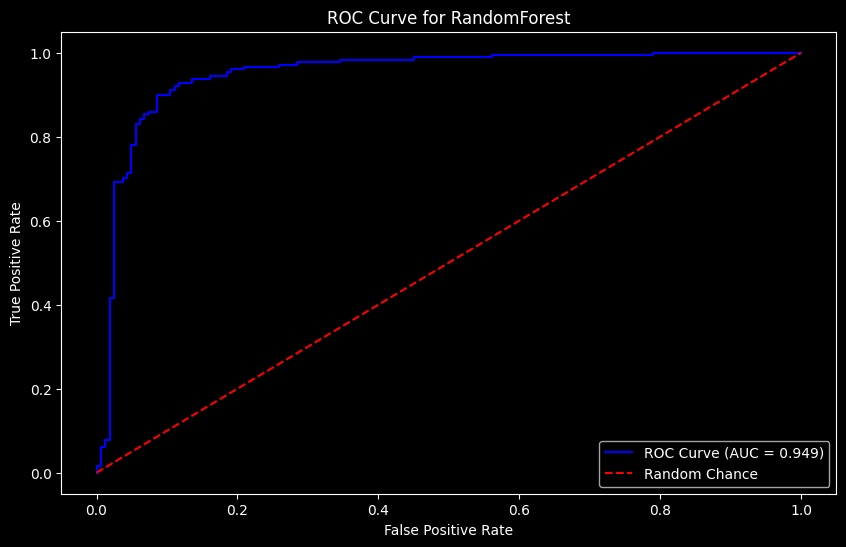

RandomForest - Confusion Matrix:
 [[138  24]
 [ 11 167]]


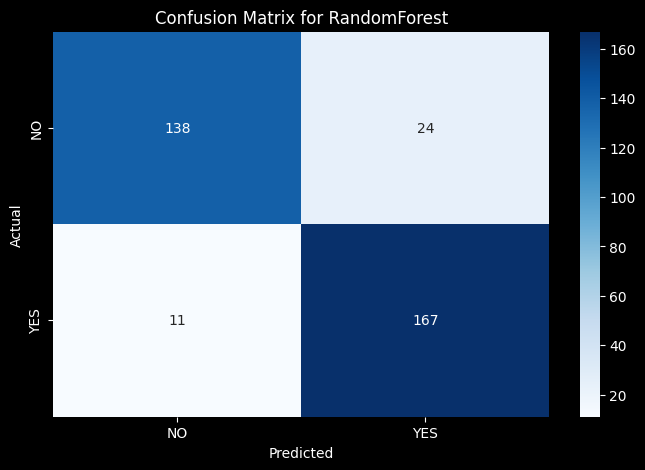

RandomForest - Classification Report:
               precision    recall  f1-score   support

          NO       0.93      0.85      0.89       162
         YES       0.87      0.94      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340

Plot feature importance using standard method (not SHAP)



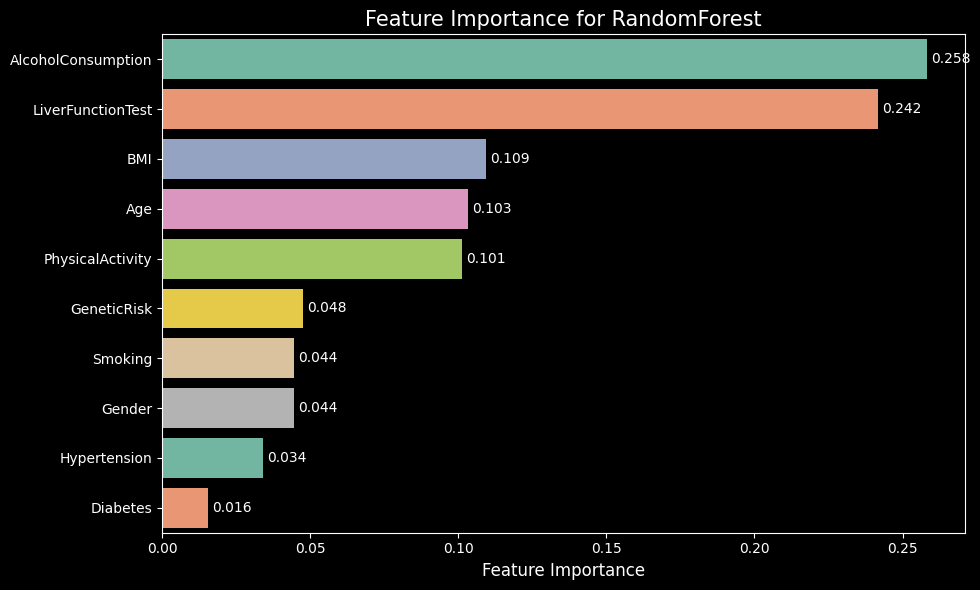

Plot SHAP values for model explanation



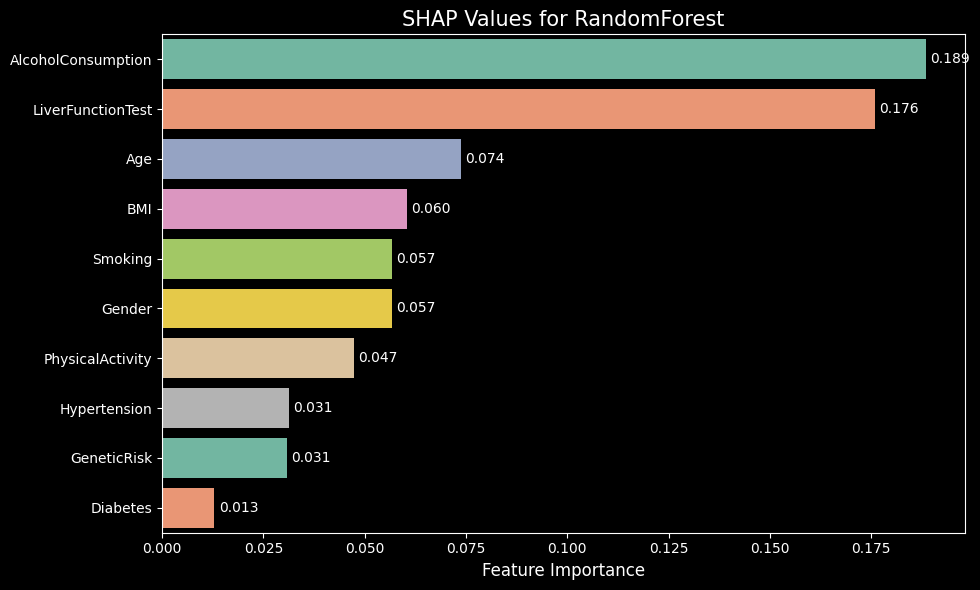

In [72]:
### RandomForest
random_forest_params = best_results_df.loc[best_results_df['Model'] == 'RandomForest', 'Best Params'].values[0]
models['RandomForest'].set_params(**random_forest_params)
RandomForest = train_and_evaluate_model(models['RandomForest'], 'RandomForest', X_train, y_train, X_test, y_test)

XGBoost - Training Accuracy: 0.954
XGBoost - Test Accuracy: 0.915
XGBoost - Training Precision: 0.953
XGBoost - Test Precision: 0.894
XGBoost - Training Recall: 0.966
XGBoost - Test Recall: 0.949
XGBoost - Training F1 Score: 0.959
XGBoost - Test F1 Score: 0.921
XGBoost - ROC AUC Score: 0.956


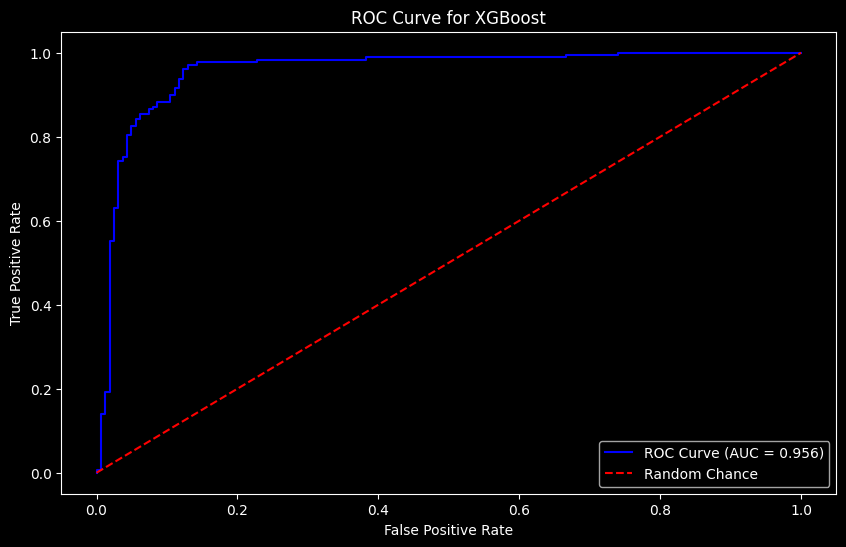

XGBoost - Confusion Matrix:
 [[142  20]
 [  9 169]]


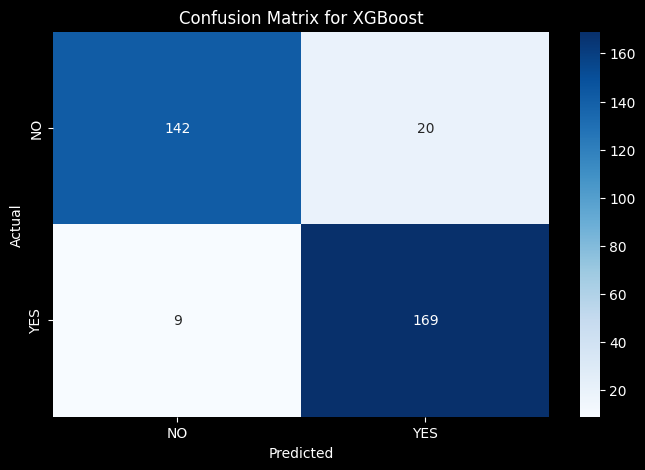

XGBoost - Classification Report:
               precision    recall  f1-score   support

          NO       0.94      0.88      0.91       162
         YES       0.89      0.95      0.92       178

    accuracy                           0.91       340
   macro avg       0.92      0.91      0.91       340
weighted avg       0.92      0.91      0.91       340

Plot feature importance using standard method (not SHAP)



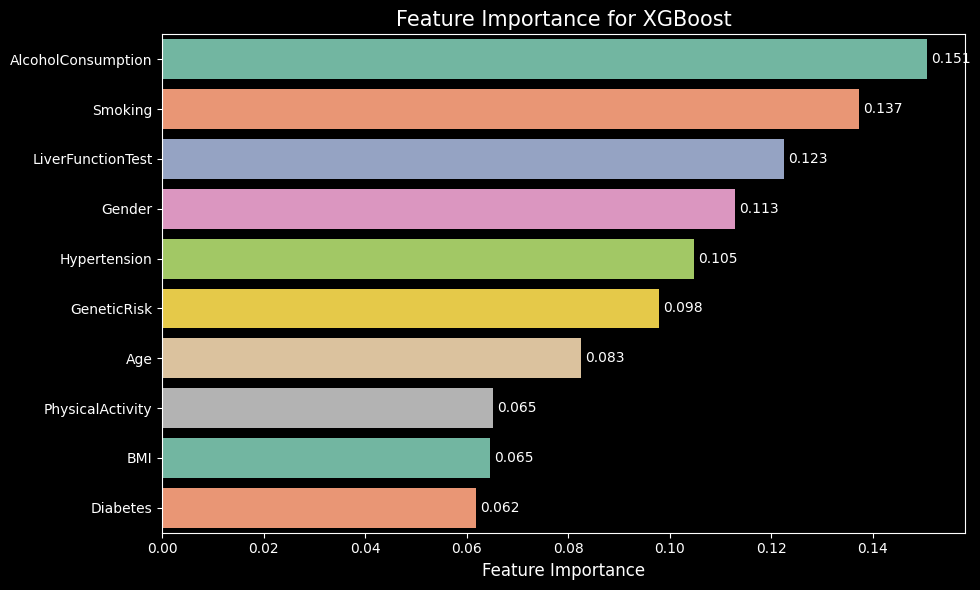

Plot SHAP values for model explanation



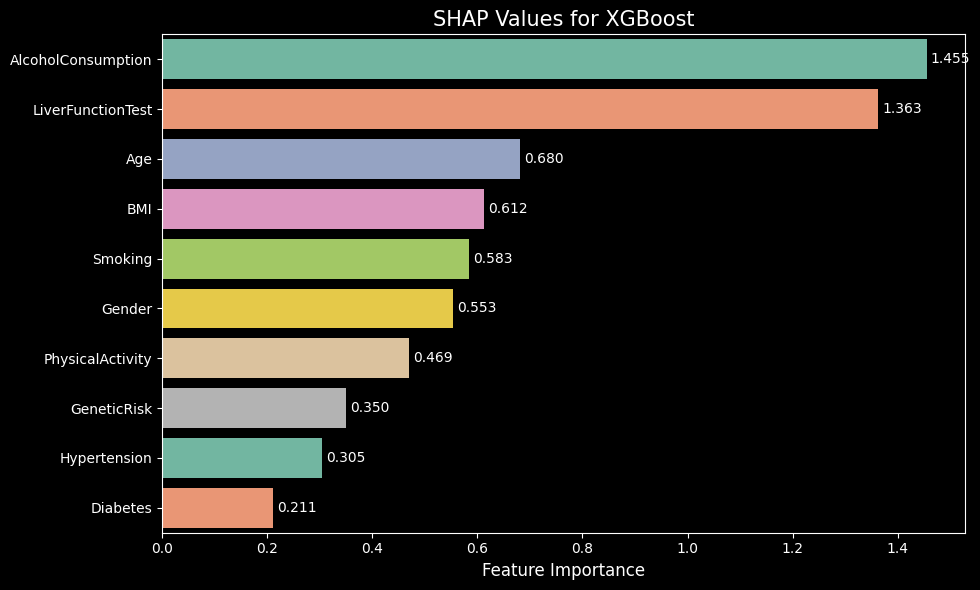

In [73]:
# XGBoost
xgboost_params = best_results_df.loc[best_results_df['Model'] == 'XGBoost', 'Best Params'].values[0]
models['XGBoost'].set_params(**xgboost_params)
XGBoost = train_and_evaluate_model(models['XGBoost'], 'XGBoost', X_train, y_train, X_test, y_test)

LGBM - Training Accuracy: 0.985
LGBM - Test Accuracy: 0.900
LGBM - Training Precision: 0.989
LGBM - Test Precision: 0.883
LGBM - Training Recall: 0.984
LGBM - Test Recall: 0.933
LGBM - Training F1 Score: 0.987
LGBM - Test F1 Score: 0.907
LGBM - ROC AUC Score: 0.946


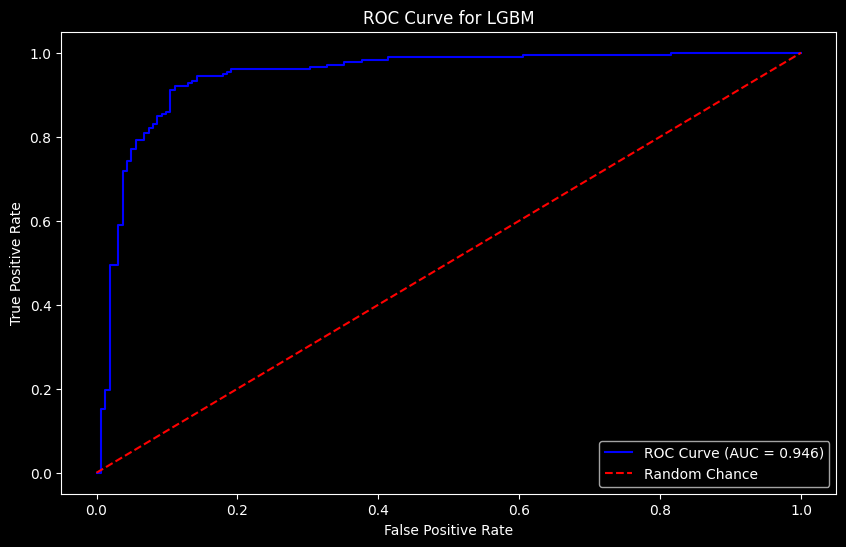

LGBM - Confusion Matrix:
 [[140  22]
 [ 12 166]]


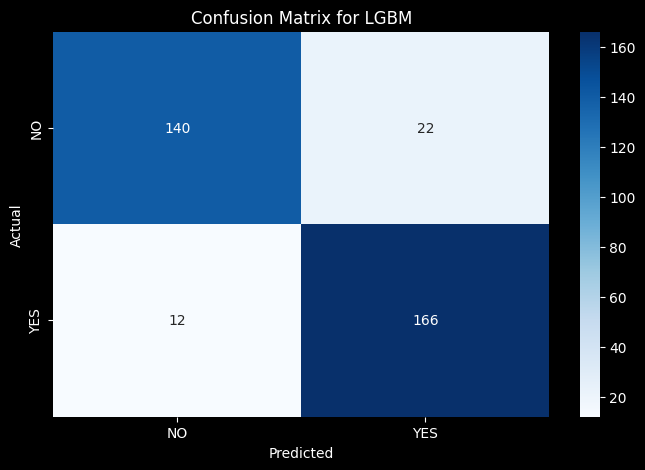

LGBM - Classification Report:
               precision    recall  f1-score   support

          NO       0.92      0.86      0.89       162
         YES       0.88      0.93      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340

Plot feature importance using standard method (not SHAP)



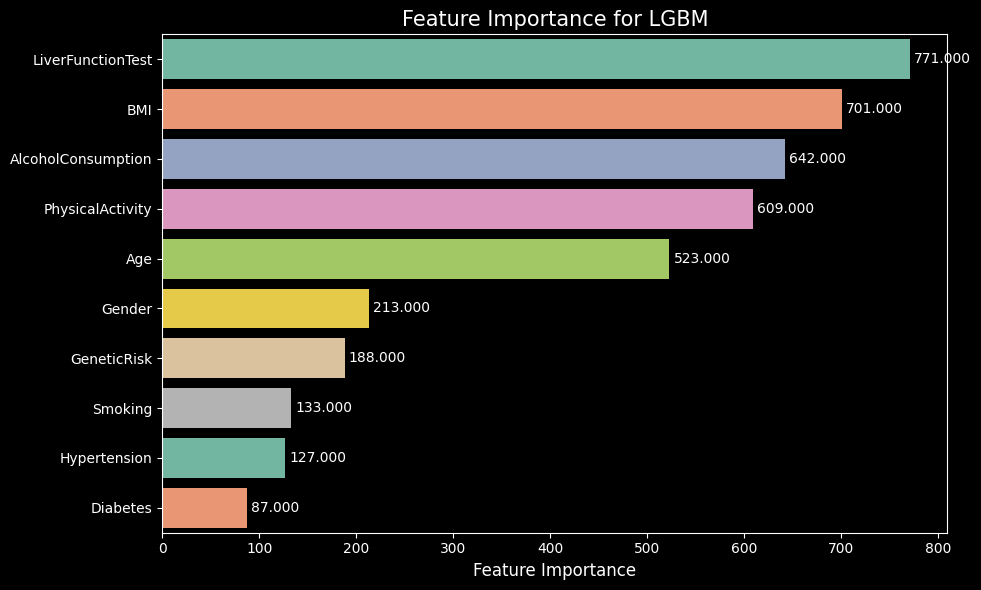

Plot SHAP values for model explanation



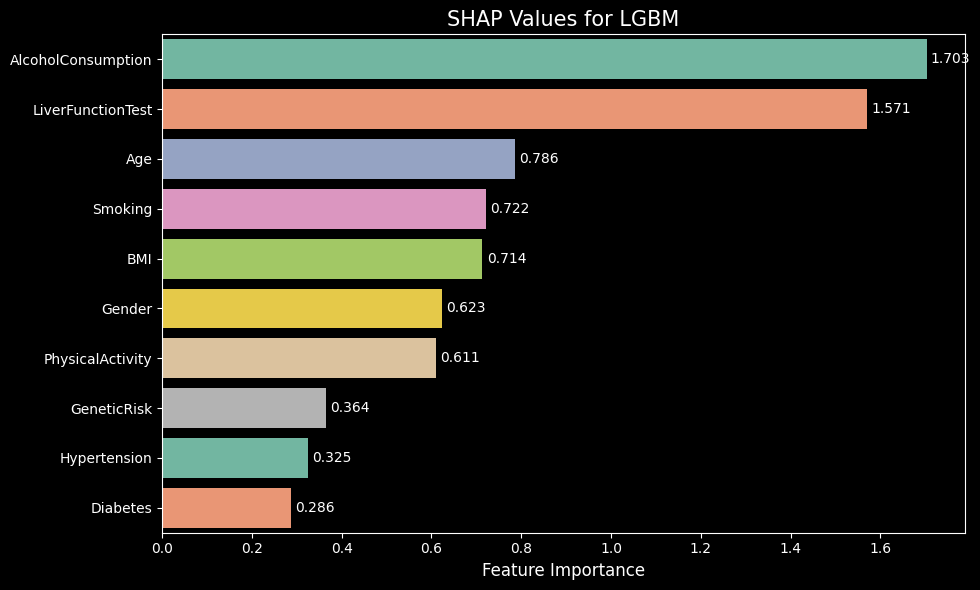

In [74]:
# LGBM
lgbm_params = best_results_df.loc[best_results_df['Model'] == 'LGBM', 'Best Params'].values[0]
models['LGBM'].set_params(**lgbm_params)
LGBM = train_and_evaluate_model(models['LGBM'], 'LGBM', X_train, y_train, X_test, y_test)

AdaBoost - Training Accuracy: 0.919
AdaBoost - Test Accuracy: 0.882
AdaBoost - Training Precision: 0.925
AdaBoost - Test Precision: 0.867
AdaBoost - Training Recall: 0.930
AdaBoost - Test Recall: 0.916
AdaBoost - Training F1 Score: 0.928
AdaBoost - Test F1 Score: 0.891
AdaBoost - ROC AUC Score: 0.943


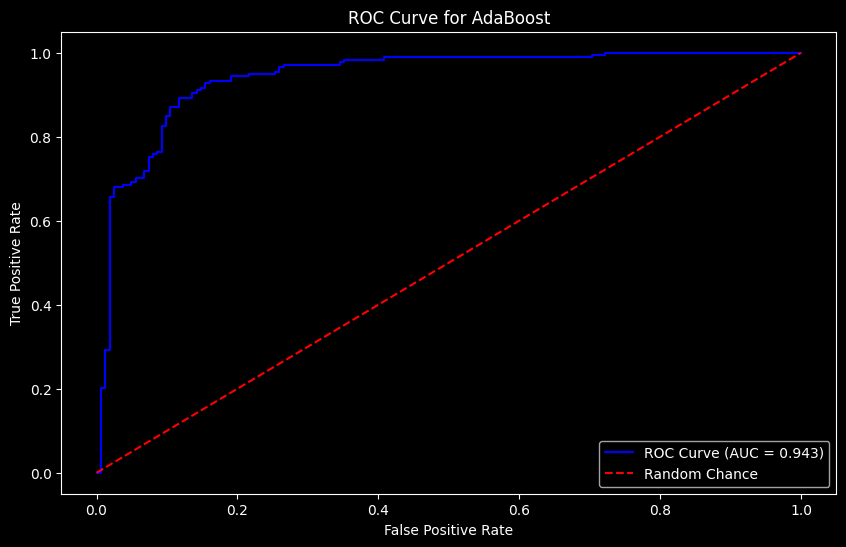

AdaBoost - Confusion Matrix:
 [[137  25]
 [ 15 163]]


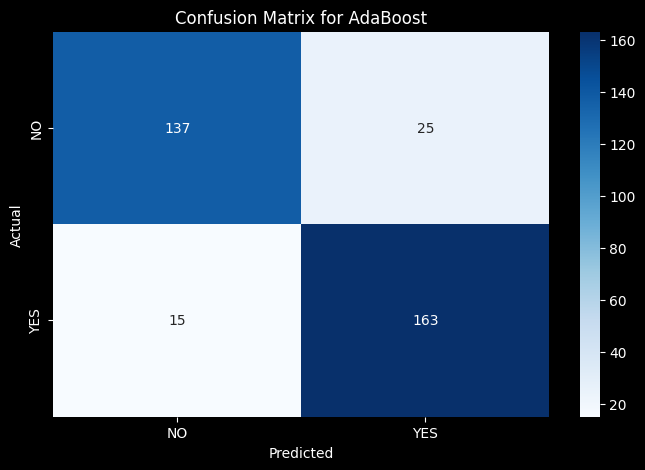

AdaBoost - Classification Report:
               precision    recall  f1-score   support

          NO       0.90      0.85      0.87       162
         YES       0.87      0.92      0.89       178

    accuracy                           0.88       340
   macro avg       0.88      0.88      0.88       340
weighted avg       0.88      0.88      0.88       340

Plot feature importance using standard method (not SHAP)



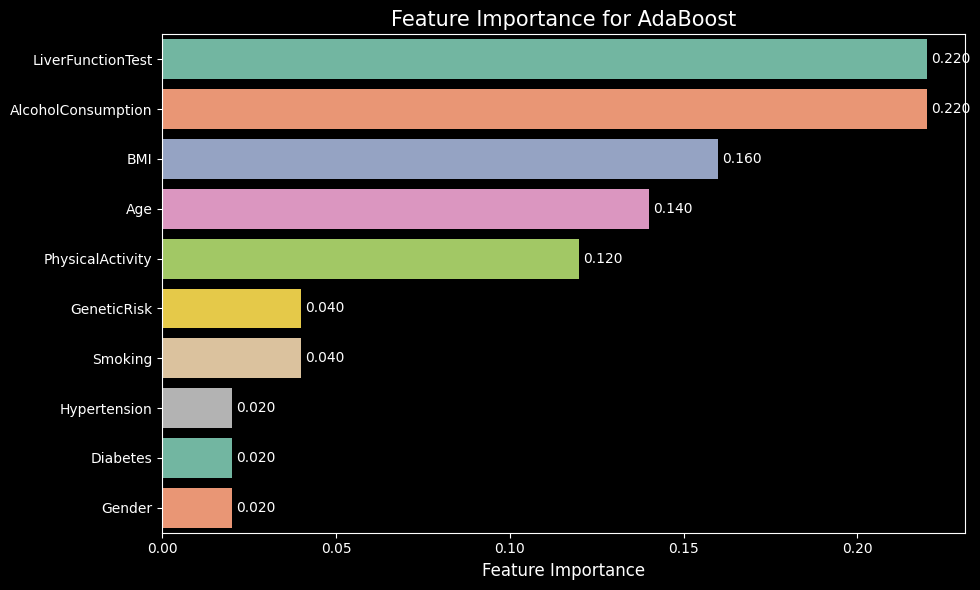

Plot SHAP values for model explanation



  0%|          | 0/340 [00:00<?, ?it/s]

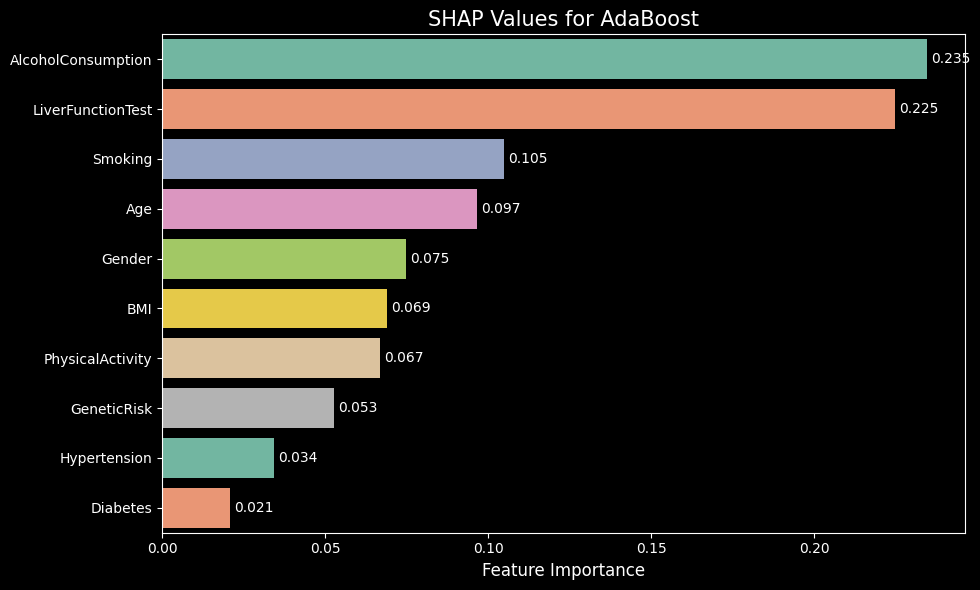

In [75]:
# AdaBoost
#adaboost_params = best_results_df.loc[best_results_df['Model'] == 'AdaBoost', 'Best Params'].values[0]
models['AdaBoost'].set_params()
AdaBoost = train_and_evaluate_model(models['AdaBoost'], 'AdaBoost', X_train, y_train, X_test, y_test)

GradientBoosting - Training Accuracy: 1.000
GradientBoosting - Test Accuracy: 0.882
GradientBoosting - Training Precision: 1.000
GradientBoosting - Test Precision: 0.871
GradientBoosting - Training Recall: 1.000
GradientBoosting - Test Recall: 0.910
GradientBoosting - Training F1 Score: 1.000
GradientBoosting - Test F1 Score: 0.890
GradientBoosting - ROC AUC Score: 0.943


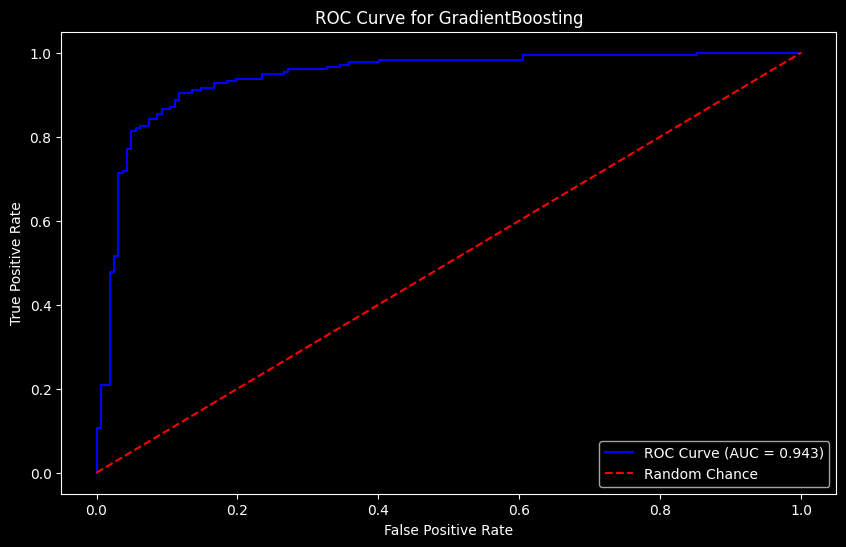

GradientBoosting - Confusion Matrix:
 [[138  24]
 [ 16 162]]


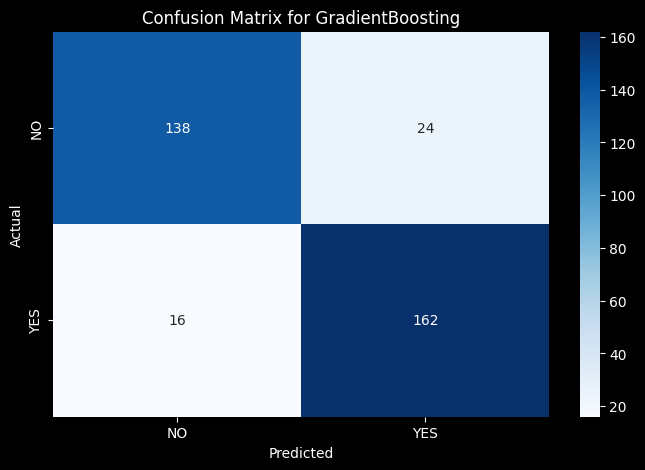

GradientBoosting - Classification Report:
               precision    recall  f1-score   support

          NO       0.90      0.85      0.87       162
         YES       0.87      0.91      0.89       178

    accuracy                           0.88       340
   macro avg       0.88      0.88      0.88       340
weighted avg       0.88      0.88      0.88       340

Plot feature importance using standard method (not SHAP)



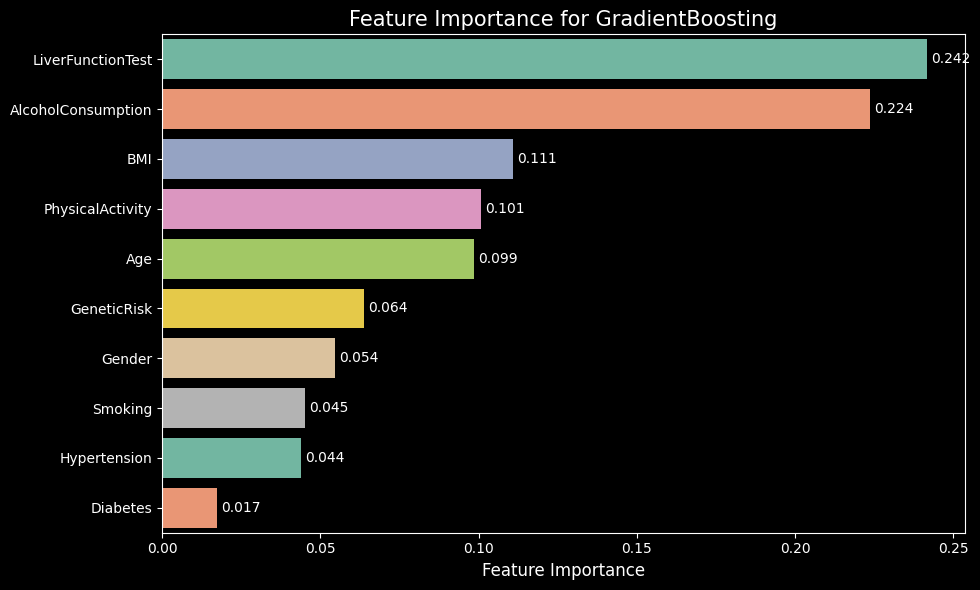

Plot SHAP values for model explanation



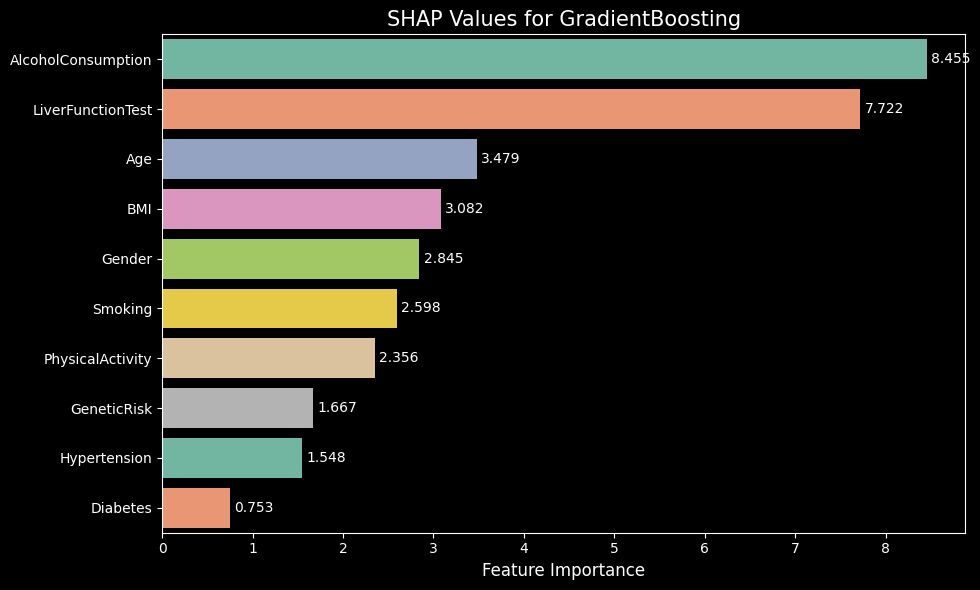

In [76]:
# Gradient Boosting
gradient_boosting_params = best_results_df.loc[best_results_df['Model'] == 'GradientBoosting', 'Best Params'].values[0]
models['GradientBoosting'].set_params(**gradient_boosting_params)
GradientBoosting = train_and_evaluate_model(models['GradientBoosting'], 'GradientBoosting', X_train, y_train, X_test, y_test)

DecisionTree - Training Accuracy: 0.960
DecisionTree - Test Accuracy: 0.850
DecisionTree - Training Precision: 0.978
DecisionTree - Test Precision: 0.855
DecisionTree - Training Recall: 0.950
DecisionTree - Test Recall: 0.860
DecisionTree - Training F1 Score: 0.964
DecisionTree - Test F1 Score: 0.857
DecisionTree - ROC AUC Score: 0.880


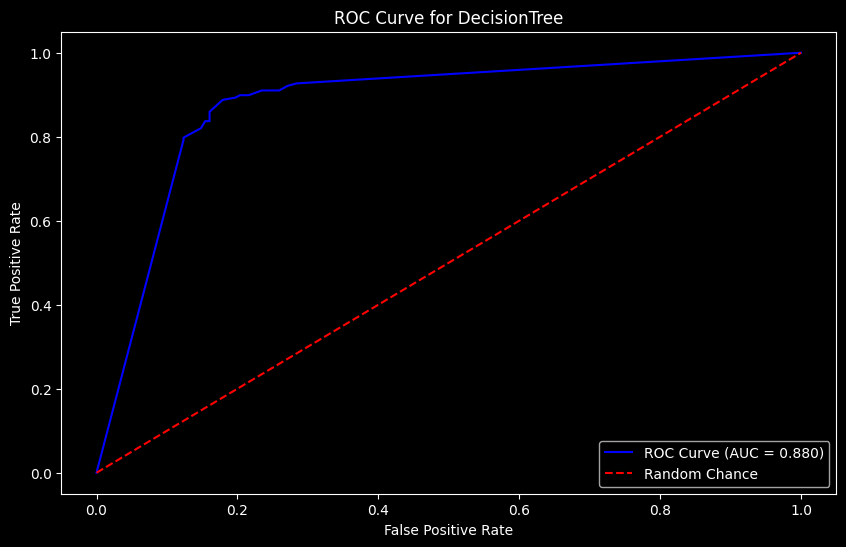

DecisionTree - Confusion Matrix:
 [[136  26]
 [ 25 153]]


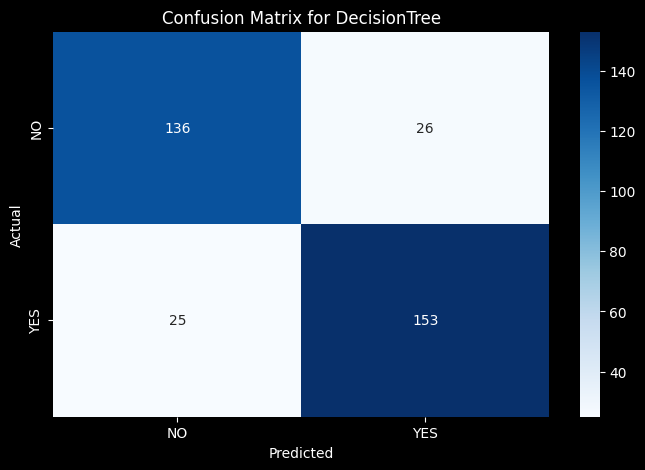

DecisionTree - Classification Report:
               precision    recall  f1-score   support

          NO       0.84      0.84      0.84       162
         YES       0.85      0.86      0.86       178

    accuracy                           0.85       340
   macro avg       0.85      0.85      0.85       340
weighted avg       0.85      0.85      0.85       340

Plot feature importance using standard method (not SHAP)



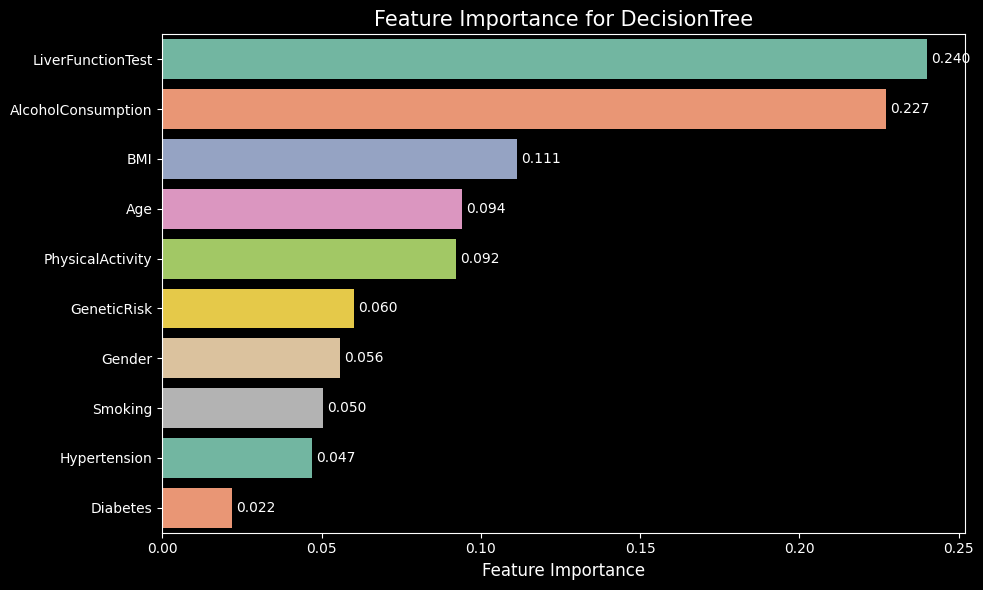

Plot SHAP values for model explanation



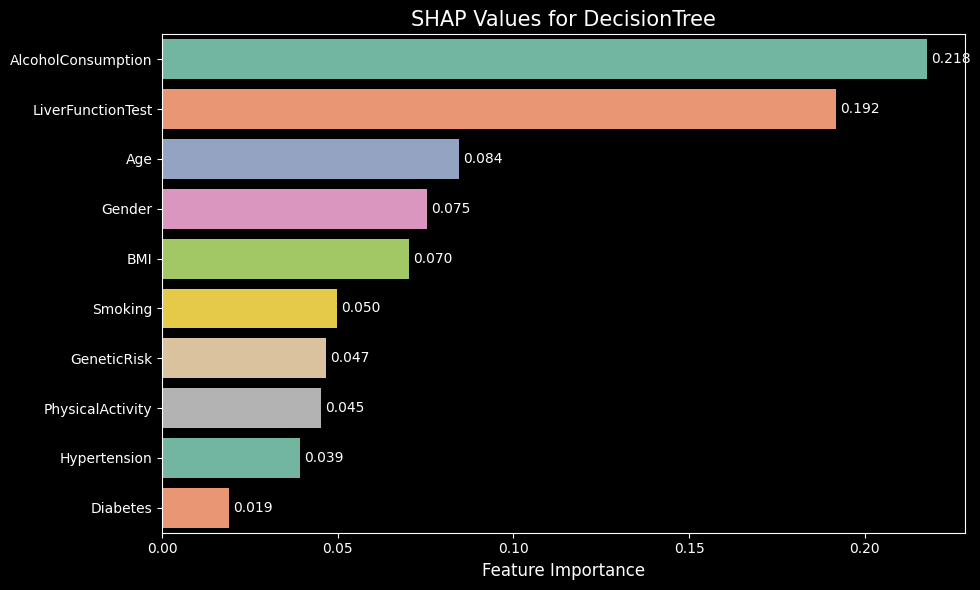

In [77]:
# DecisionTree
decision_tree_params = best_results_df.loc[best_results_df['Model'] == 'DecisionTree', 'Best Params'].values[0]
models['DecisionTree'].set_params(**decision_tree_params)
DecisionTree = train_and_evaluate_model(models['DecisionTree'], 'DecisionTree', X_train, y_train, X_test, y_test)

KNN - Training Accuracy: 1.000
KNN - Test Accuracy: 0.835
KNN - Training Precision: 1.000
KNN - Test Precision: 0.811
KNN - Training Recall: 1.000
KNN - Test Recall: 0.893
KNN - Training F1 Score: 1.000
KNN - Test F1 Score: 0.850
KNN - ROC AUC Score: 0.923


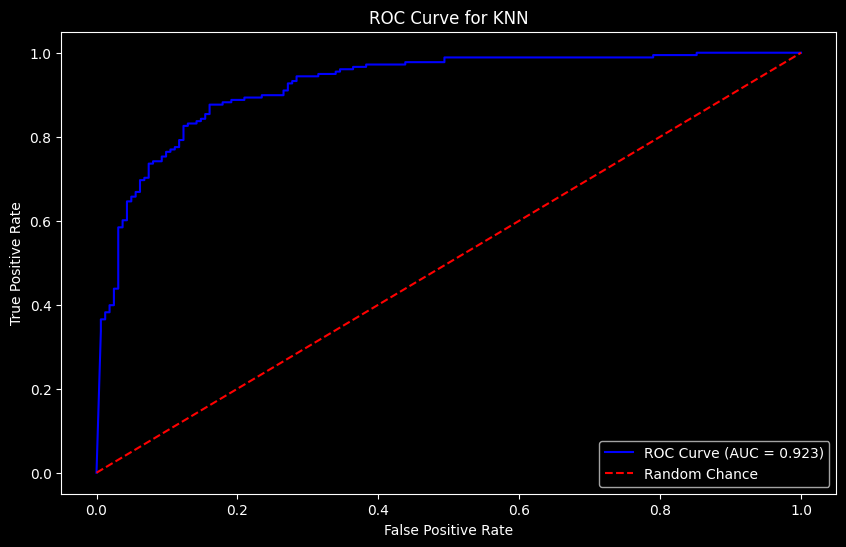

KNN - Confusion Matrix:
 [[125  37]
 [ 19 159]]


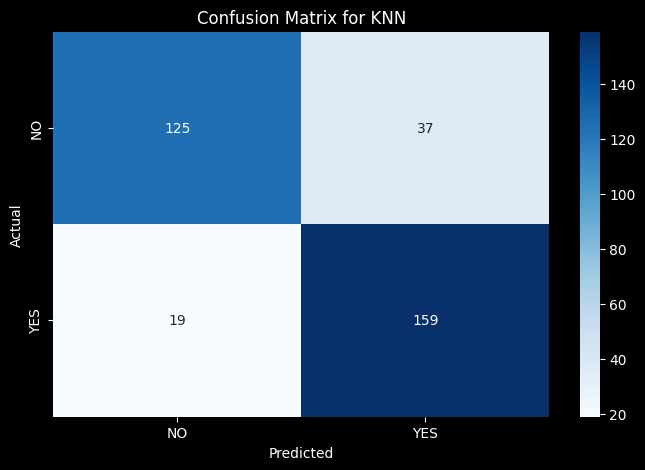

KNN - Classification Report:
               precision    recall  f1-score   support

          NO       0.87      0.77      0.82       162
         YES       0.81      0.89      0.85       178

    accuracy                           0.84       340
   macro avg       0.84      0.83      0.83       340
weighted avg       0.84      0.84      0.83       340

Plot feature importance using standard method (not SHAP)



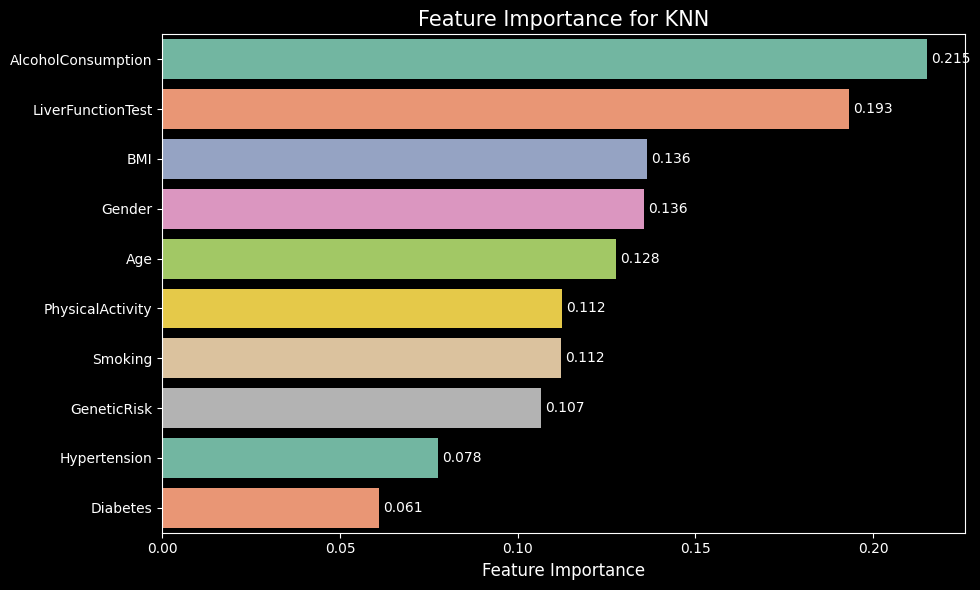

Plot SHAP values for model explanation



  0%|          | 0/340 [00:00<?, ?it/s]

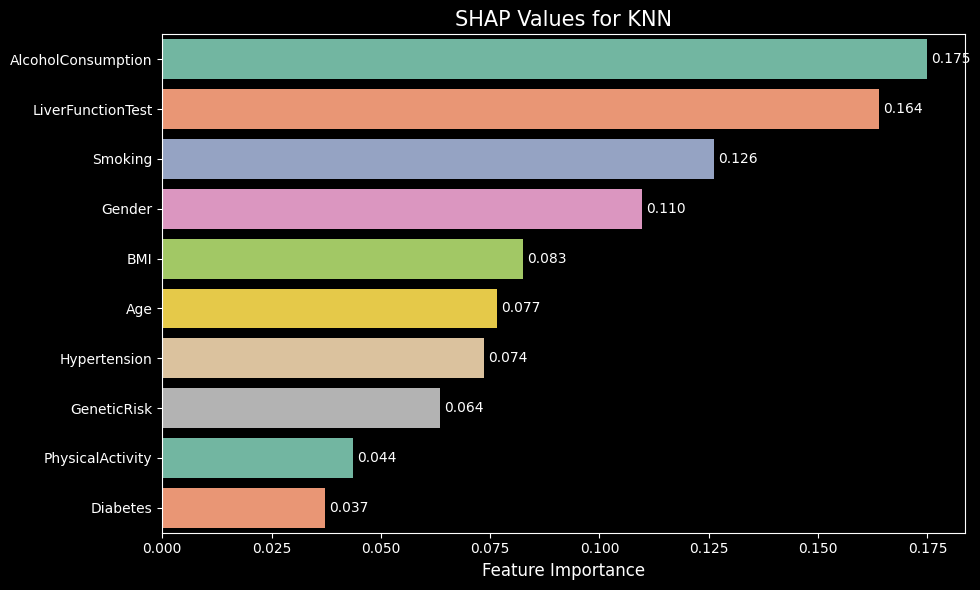

In [78]:
# KNN
knn_params = best_results_df.loc[best_results_df['Model'] == 'KNN', 'Best Params'].values[0]
models['KNN'].set_params(**knn_params)
KNN = train_and_evaluate_model(models['KNN'], 'KNN', X_train, y_train, X_test, y_test)

SVC - Training Accuracy: 0.872
SVC - Test Accuracy: 0.865
SVC - Training Precision: 0.891
SVC - Test Precision: 0.863
SVC - Training Recall: 0.877
SVC - Test Recall: 0.882
SVC - Training F1 Score: 0.884
SVC - Test F1 Score: 0.872
SVC - ROC AUC Score: 0.928


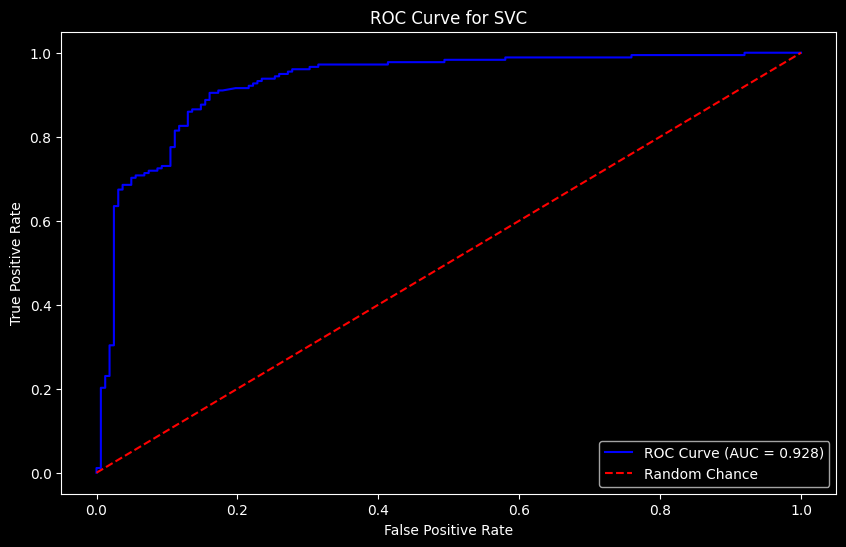

SVC - Confusion Matrix:
 [[137  25]
 [ 21 157]]


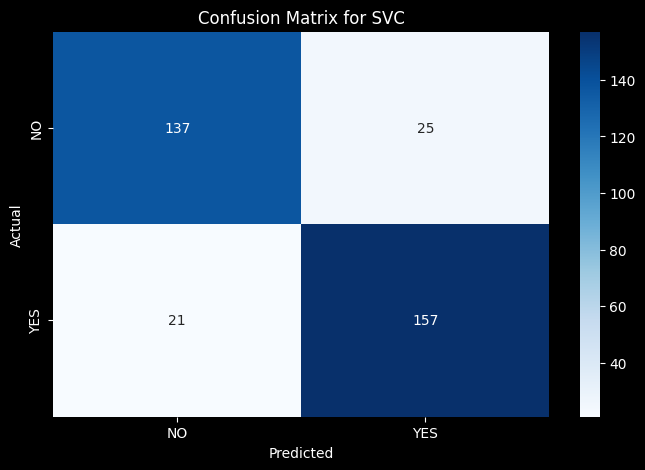

SVC - Classification Report:
               precision    recall  f1-score   support

          NO       0.87      0.85      0.86       162
         YES       0.86      0.88      0.87       178

    accuracy                           0.86       340
   macro avg       0.86      0.86      0.86       340
weighted avg       0.86      0.86      0.86       340

Plot feature importance using standard method (not SHAP)



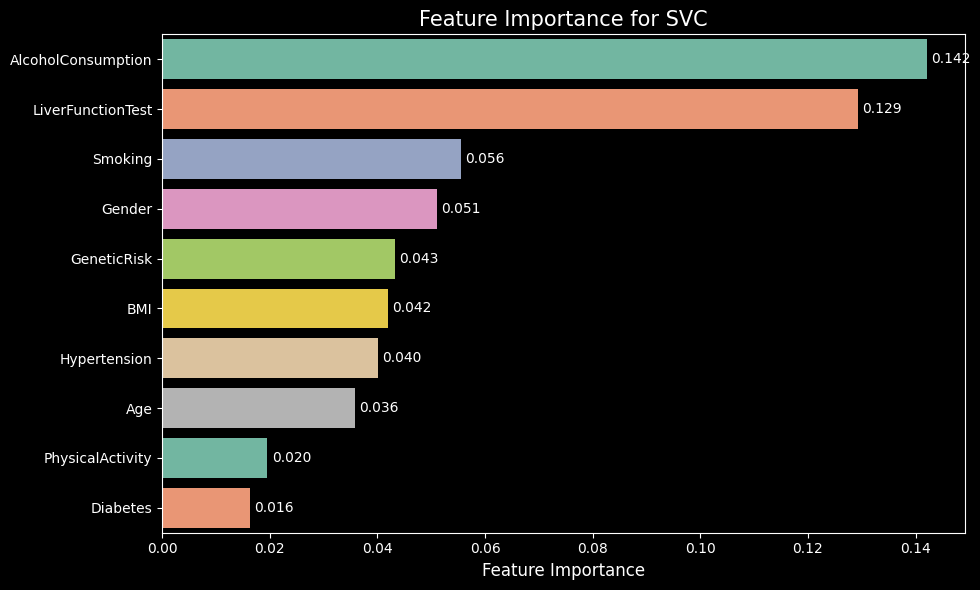

Plot SHAP values for model explanation



  0%|          | 0/340 [00:00<?, ?it/s]

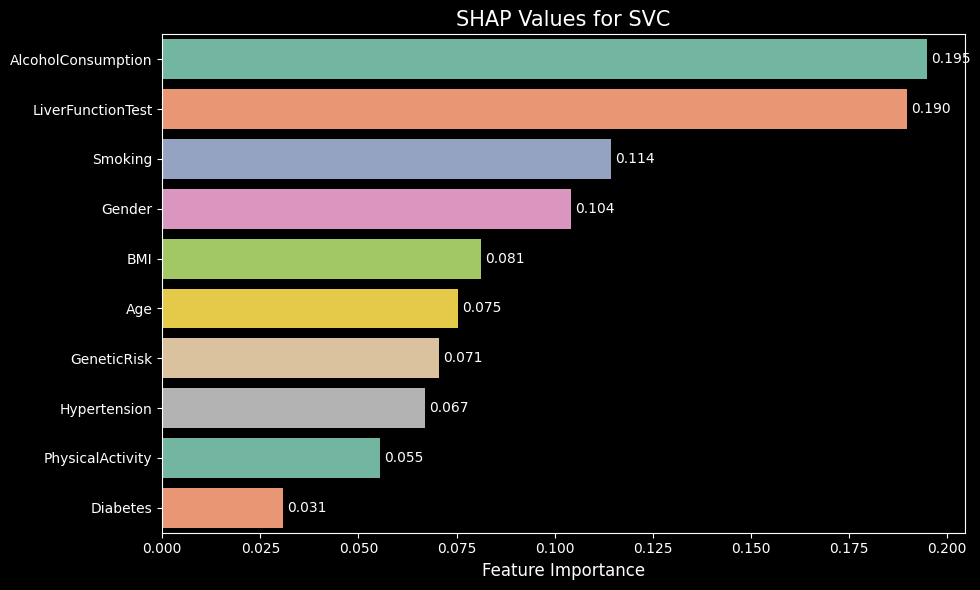

In [79]:
# SVC
svc_params = best_results_df.loc[best_results_df['Model'] == 'SVC', 'Best Params'].values[0]
models['SVC'].set_params(**svc_params)
SVC = train_and_evaluate_model(models['SVC'], 'SVC', X_train, y_train, X_test, y_test)

LogisticRegression - Training Accuracy: 0.824
LogisticRegression - Test Accuracy: 0.832
LogisticRegression - Training Precision: 0.857
LogisticRegression - Test Precision: 0.842
LogisticRegression - Training Recall: 0.822
LogisticRegression - Test Recall: 0.837
LogisticRegression - Training F1 Score: 0.839
LogisticRegression - Test F1 Score: 0.839
LogisticRegression - ROC AUC Score: 0.905


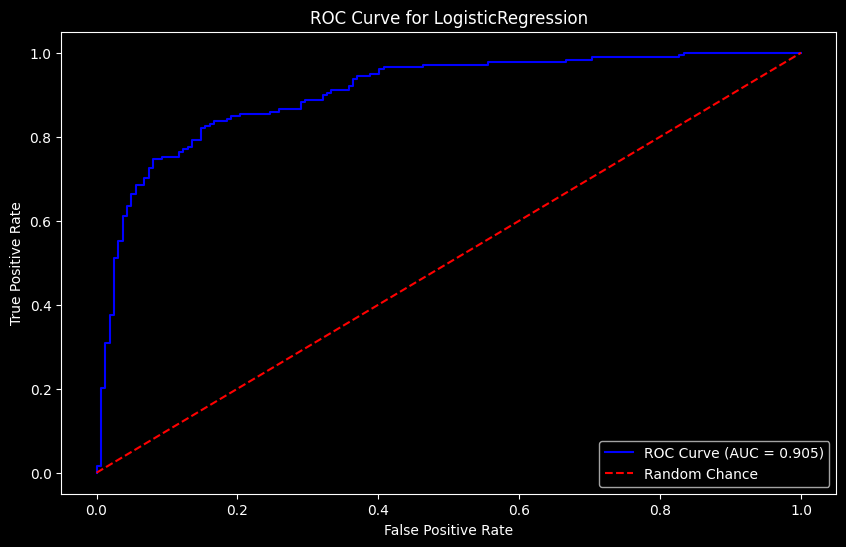

LogisticRegression - Confusion Matrix:
 [[134  28]
 [ 29 149]]


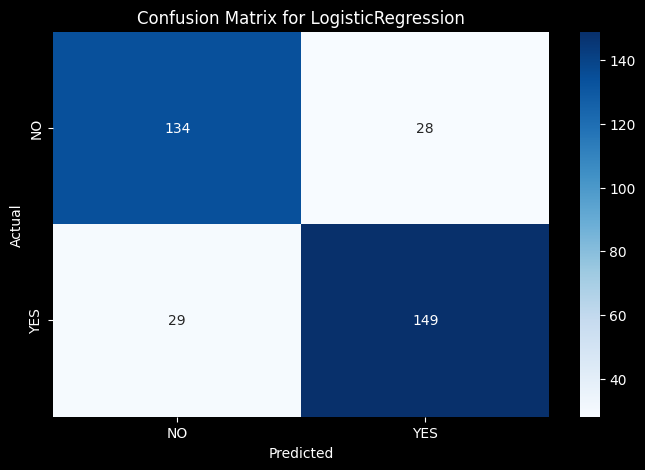

LogisticRegression - Classification Report:
               precision    recall  f1-score   support

          NO       0.82      0.83      0.82       162
         YES       0.84      0.84      0.84       178

    accuracy                           0.83       340
   macro avg       0.83      0.83      0.83       340
weighted avg       0.83      0.83      0.83       340

Plot feature importance using standard method (not SHAP)



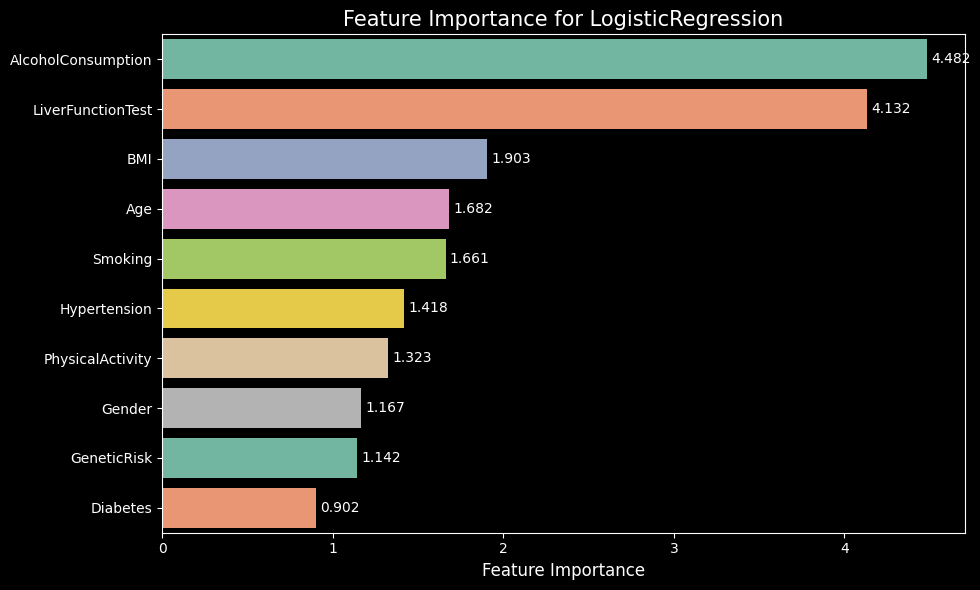

Plot SHAP values for model explanation



  0%|          | 0/340 [00:00<?, ?it/s]

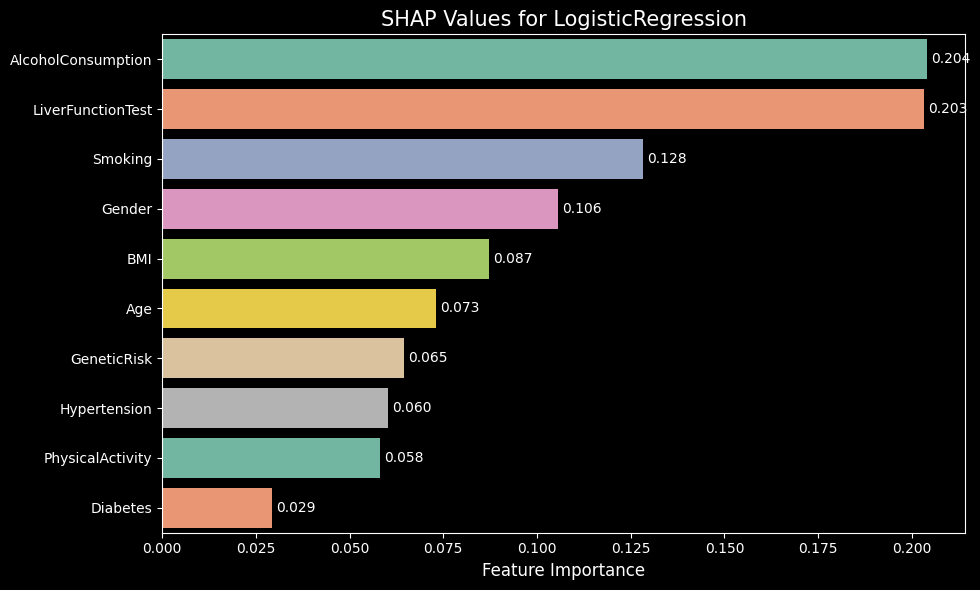

In [80]:
# Logistic Regression
logistic_params = best_results_df.loc[best_results_df['Model'] == 'LogisticRegression', 'Best Params'].values[0]
models['LogisticRegression'].set_params(**logistic_params)
LogisticRegression = train_and_evaluate_model(models['LogisticRegression'], 'LogisticRegression', X_train, y_train, X_test, y_test)

NaiveBayes - Training Accuracy: 0.810
NaiveBayes - Test Accuracy: 0.803
NaiveBayes - Training Precision: 0.832
NaiveBayes - Test Precision: 0.803
NaiveBayes - Training Recall: 0.826
NaiveBayes - Test Recall: 0.826
NaiveBayes - Training F1 Score: 0.829
NaiveBayes - Test F1 Score: 0.814
NaiveBayes - ROC AUC Score: 0.875


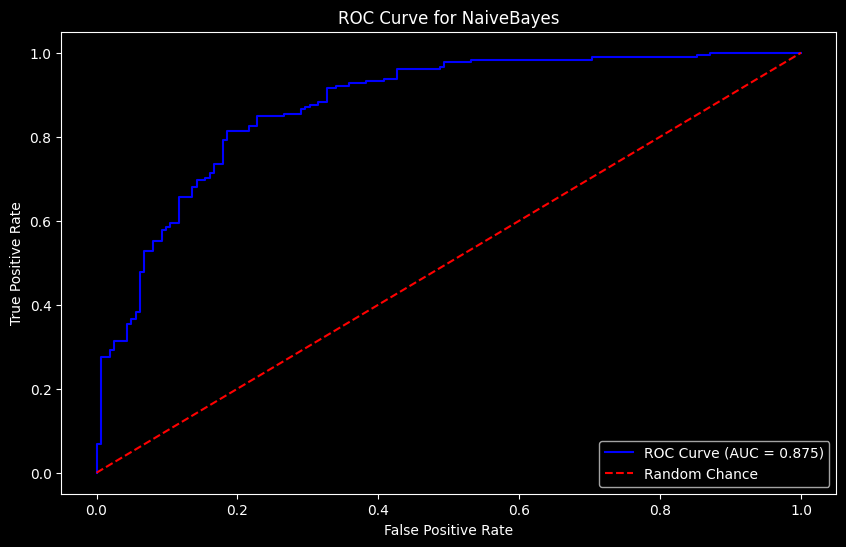

NaiveBayes - Confusion Matrix:
 [[126  36]
 [ 31 147]]


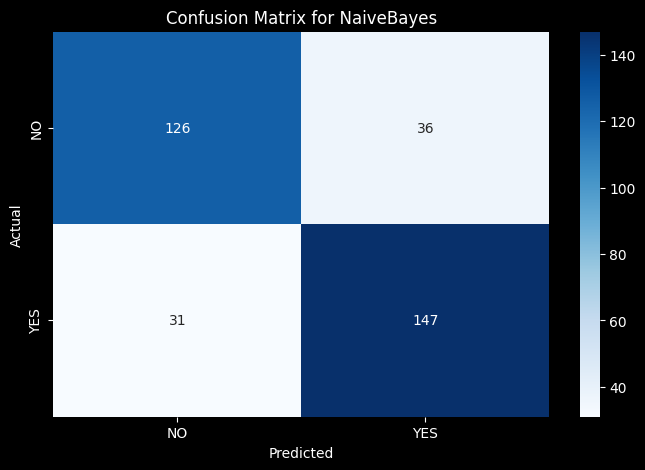

NaiveBayes - Classification Report:
               precision    recall  f1-score   support

          NO       0.80      0.78      0.79       162
         YES       0.80      0.83      0.81       178

    accuracy                           0.80       340
   macro avg       0.80      0.80      0.80       340
weighted avg       0.80      0.80      0.80       340

Plot feature importance using standard method (not SHAP)



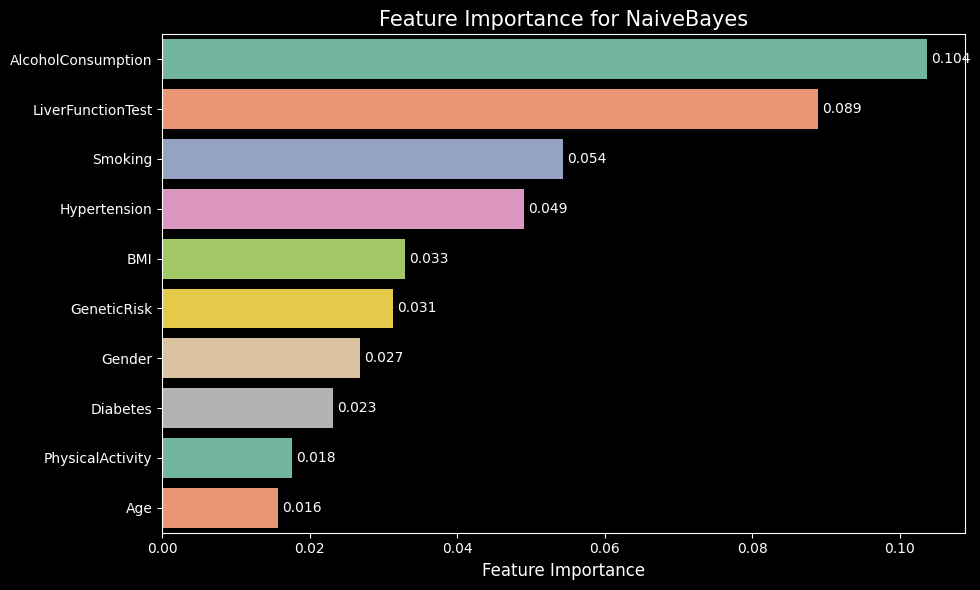

Plot SHAP values for model explanation



  0%|          | 0/340 [00:00<?, ?it/s]

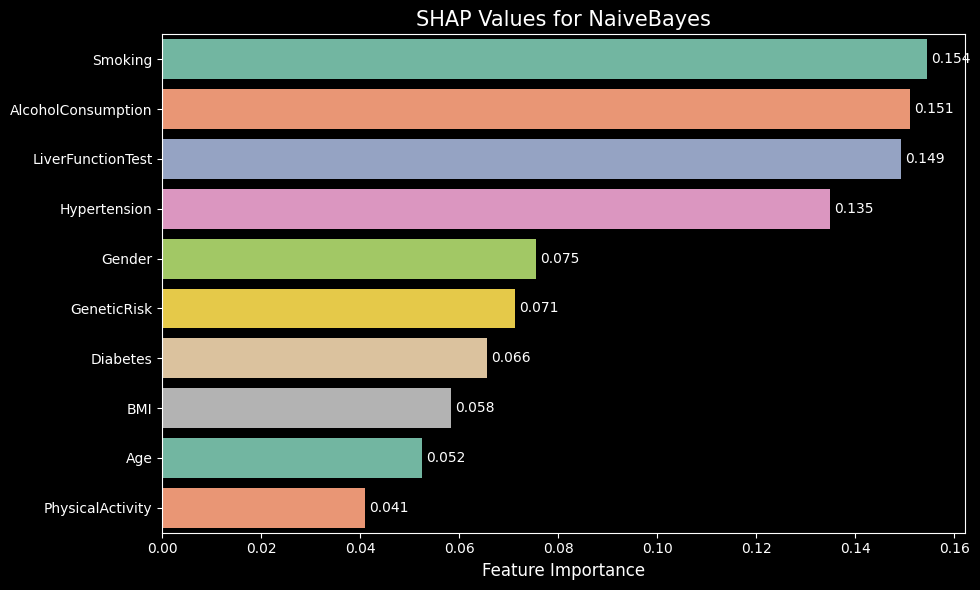

In [81]:
# Naive Bayes
naive_bayes_params = best_results_df.loc[best_results_df['Model'] == 'NaiveBayes', 'Best Params'].values[0]
models['NaiveBayes'].set_params(**naive_bayes_params)
NaiveBayes = train_and_evaluate_model(models['NaiveBayes'], 'NaiveBayes', X_train, y_train, X_test, y_test)

CatBoost - Training Accuracy: 0.973
CatBoost - Test Accuracy: 0.938
CatBoost - Training Precision: 0.976
CatBoost - Test Precision: 0.920
CatBoost - Training Recall: 0.975
CatBoost - Test Recall: 0.966
CatBoost - Training F1 Score: 0.976
CatBoost - Test F1 Score: 0.942
CatBoost - ROC AUC Score: 0.956


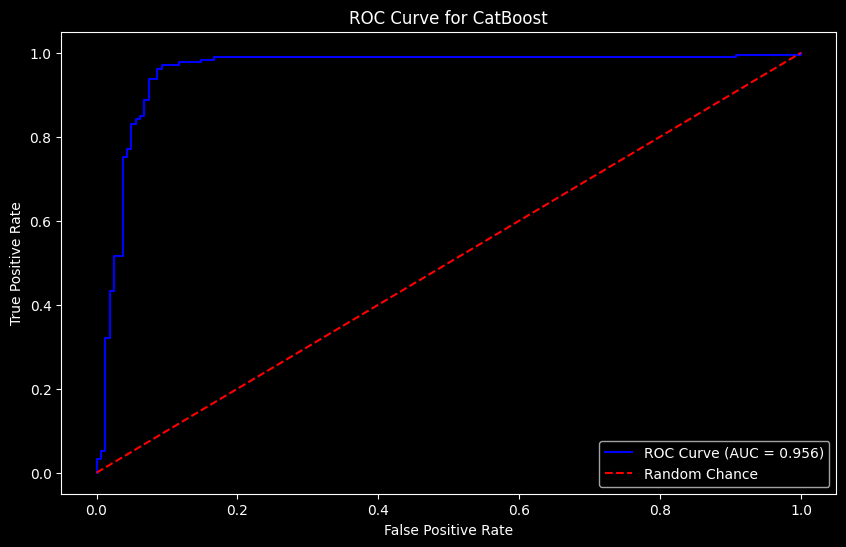

CatBoost - Confusion Matrix:
 [[147  15]
 [  6 172]]


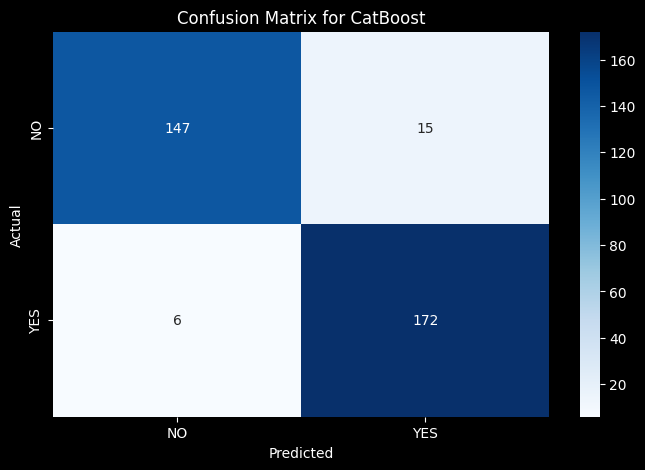

CatBoost - Classification Report:
               precision    recall  f1-score   support

          NO       0.96      0.91      0.93       162
         YES       0.92      0.97      0.94       178

    accuracy                           0.94       340
   macro avg       0.94      0.94      0.94       340
weighted avg       0.94      0.94      0.94       340

Plot feature importance using standard method (not SHAP)



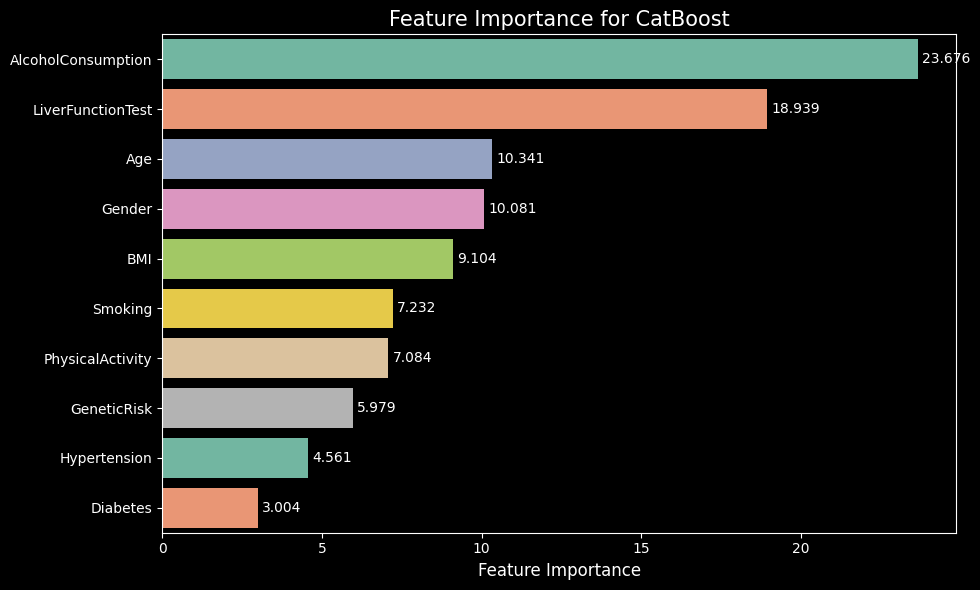

Plot SHAP values for model explanation



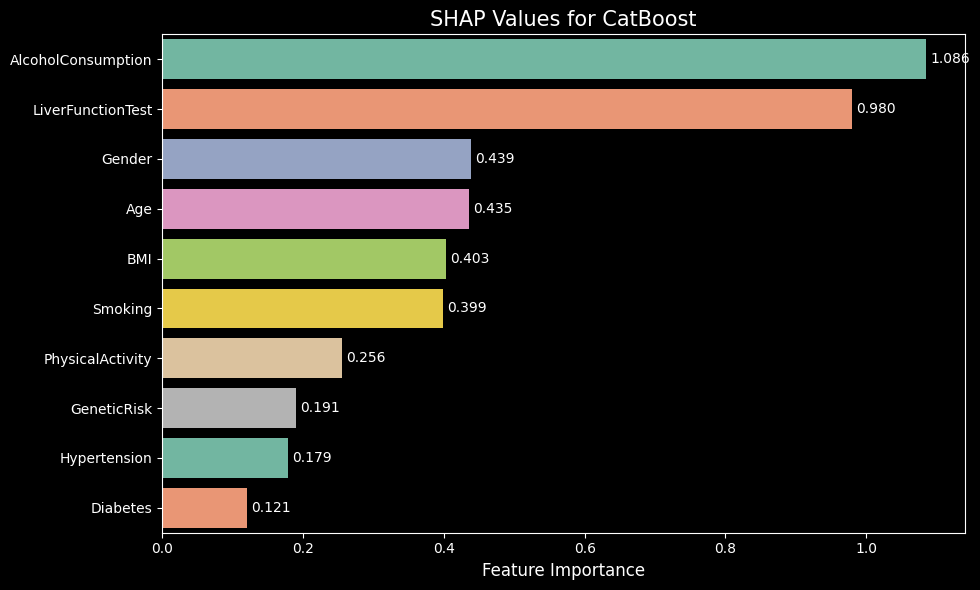

In [82]:
# CatBoost
catboost_params = best_results_df.loc[best_results_df['Model'] == 'CatBoost', 'Best Params'].values[0]
models['CatBoost'].set_params(**catboost_params)
CatBoost = train_and_evaluate_model(models['CatBoost'], 'CatBoost', X_train, y_train, X_test, y_test)

In [83]:
metrics_df = pd.DataFrame(metrics_dict).T  
metrics_df = metrics_df.sort_values(by=['Test F1', 'Test Accuracy'], ascending=False)
metrics_df

train_accuracy  train_precision  train_recall  train_f1  \
CatBoost                  0.972794         0.976222      0.974934  0.975578   
XGBoost                   0.954412         0.953125      0.965699  0.959371   
LGBM                      0.985294         0.989390      0.984169  0.986772   
RandomForest              0.991912         0.988235      0.997361  0.992777   
AdaBoost                  0.919118         0.925197      0.930079  0.927632   
GradientBoosting          1.000000         1.000000      1.000000  1.000000   
SVC                       0.872059         0.891421      0.877309  0.884309   
DecisionTree              0.960294         0.978261      0.949868  0.963855   
KNN                       1.000000         1.000000      1.000000  1.000000   
LogisticRegression        0.824265         0.856946      0.821900  0.839057   
NaiveBayes                0.810294         0.832447      0.825858  0.829139   

                    test_accuracy  test_precision  test_recall   test_f1  \
CatBoost                 0.938235        0.919786     0.966292  0.942466   
XGBoost                  0.914706        0.894180     0.949438  0.920981   
LGBM                     0.900000        0.882979     0.932584  0.907104   
RandomForest             0.897059        0.874346     0.938202  0.905149   
AdaBoost                 0.882353        0.867021     0.915730  0.890710   
GradientBoosting         0.882353        0.870968     0.910112  0.890110   
SVC                      0.864706        0.862637     0.882022  0.872222   
DecisionTree             0.850000        0.854749     0.859551  0.857143   
KNN                      0.835294        0.811224     0.893258  0.850267   
LogisticRegression       0.832353        0.841808     0.837079  0.839437   
NaiveBayes               0.802941        0.803279     0.825843  0.814404   

                     roc_auc  
CatBoost            0.956374  
XGBoost             0.956235  
LGBM                0.945554  
RandomForest        0.949195  
AdaBoost            0.942502  
GradientBoosting    0.943473  
SVC                 0.928405  
DecisionTree        0.880289  
KNN                 0.922840  
LogisticRegression  0.904876  
NaiveBayes          0.874567

In [84]:
# Assuming metrics_df contains the evaluation metrics and is sorted by performance
# Get the name of the best model
# Get the metrics for the best model
best_model_name = metrics_df.index[0]  
best_model_metrics = metrics_df.loc[best_model_name]  
print(f"The best model is: {best_model_name}")
print(f"Metrics for {best_model_name}:")
print(f"  Training Accuracy: {best_model_metrics['Train Accuracy']:.2f}")
print(f"  Training Precision: {best_model_metrics['Train Precision']:.2f}")
print(f"  Training Recall: {best_model_metrics['Train Recall']:.2f}")
print(f"  Training F1 Score: {best_model_metrics['Train F1']:.2f}")
print(f"  Test Accuracy: {best_model_metrics['Test Accuracy']:.2f}")
print(f"  Test Precision: {best_model_metrics['Test Precision']:.2f}")
print(f"  Test Recall: {best_model_metrics['Test Recall']:.2f}")
print(f"  Test F1 Score: {best_model_metrics['Test F1']:.2f}")
print(f"  Test AUC Score: {best_model_metrics['Test AUC']:.2f}")

The best model is: CatBoost
Metrics for CatBoost:
  Training Accuracy: 0.97
  Training Precision: 0.98
  Training Recall: 0.97
  Training F1 Score: 0.98
  Test Accuracy: 0.94
  Test Precision: 0.92
  Test Recall: 0.97
  Test F1 Score: 0.94


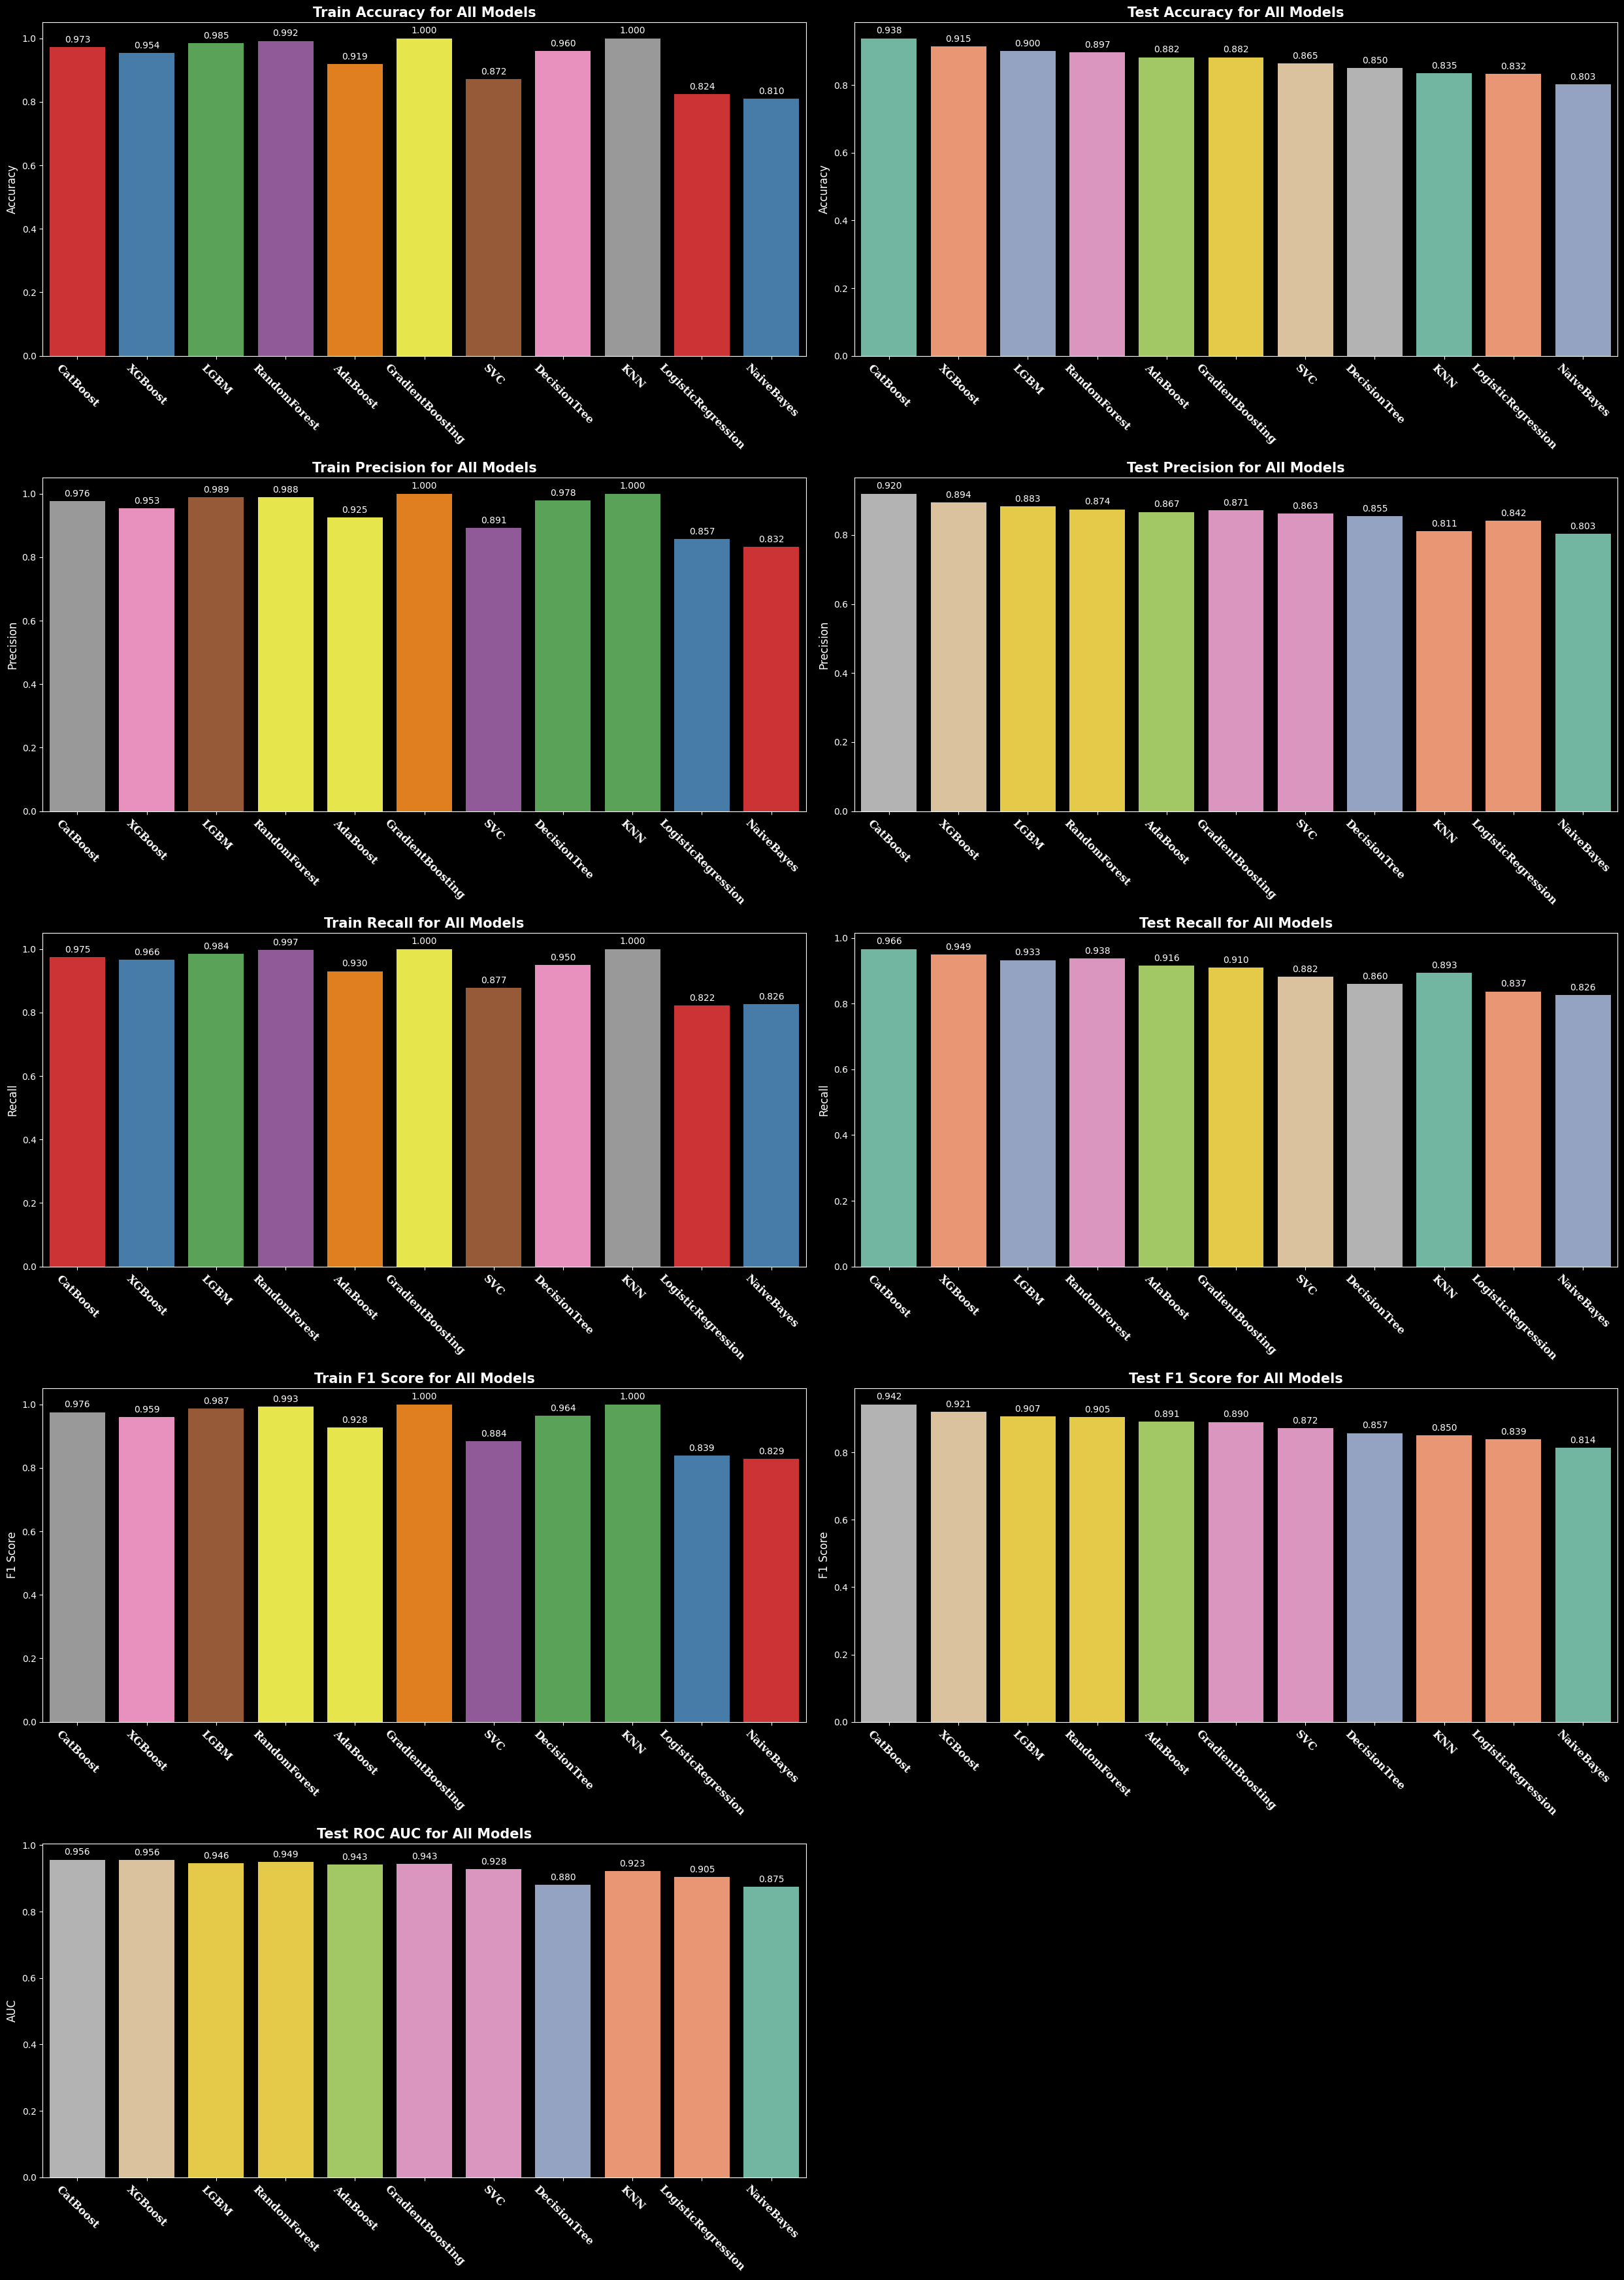

In [85]:
ax = metrics_df.plot(kind="bar", stacked=True, figsize=(14, 10), colormap="tab20b")
# Annotate bar values at the center
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0: 
            ax.text(bar.get_x() + bar.get_width() / 2,bar.get_y() + bar.get_height() / 2,f"{bar.get_height():.3f}",
                ha="center",va="center",fontsize=10,color="black")
# Add titles and labels
plt.title("Train and Test Metrics Comparison Across Models with Values", fontsize=12, weight='bold')
plt.xlabel("Models", fontsize=10, weight='bold')
plt.ylabel("Metric Value", fontsize=10, weight='bold')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(metrics_df.index, fontdict=font_properties, rotation=45, ha='right')
plt.legend(title="Metrics", bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=12,title_fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    metrics_df,
    annot=True,
    fmt=".4f",
    cmap="tab20b",
    cbar_kws={"label": "Metric Value"},
    linewidths=0.5,
)
plt.title("Model Performance Metrics", fontsize=12, weight='bold')
plt.xlabel("Metrics", fontsize=10, weight='bold')
plt.ylabel("Models", fontsize=10, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
ax.set_xticklabels(metrics_df.index, fontdict=font_properties, rotation=45, ha='right')
ax.set_yticklabels(metrics_df.columns, fontdict=font_properties, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [86]:
### Save Best Model
with open(f'{best_model_name}_model.pkl', 'wb') as file:
    pickle.dump(models[best_model_name], file)
with open(f'{best_model_name}_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(f"The model '{best_model_name}' has been loaded successfully.")
print(type(loaded_model))

The model 'CatBoost' has been loaded successfully.
<class 'catboost.core.CatBoostClassifier'>


<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">DL Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [87]:
seed_value = 44
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = keras.models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,193 (782.00 KB)

 Trainable params: 200,193 (782.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
early_stopping = EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)
model_checkpoint = ModelCheckpoint('keras_model.keras',monitor='val_loss',save_best_only=True,mode='min',verbose=1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/100


I0000 00:00:1734300666.840946     547 service.cc:145] XLA service 0x7b59fc004fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734300666.841013     547 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/17 ━━━━━━━━━━━━━━━━━━━━ 1:12 5s/step - accuracy: 0.5000 - loss: 0.7016

I0000 00:00:1734300670.279416     547 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 0.61538, saving model to keras_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5596 - loss: 0.6664 - val_accuracy: 0.6581 - val_loss: 0.6154
Epoch 2/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5781 - loss: 0.6362
Epoch 2: val_loss improved from 0.61538 to 0.52622, saving model to keras_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6456 - loss: 0.6142 - val_accuracy: 0.7647 - val_loss: 0.5262
Epoch 3/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6875 - loss: 0.6178
Epoch 3: val_loss improved from 0.52622 to 0.46253, saving model to keras_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7252 - loss: 0.5544 - val_accuracy: 0.7941 - val_loss: 0.4625
Epoch 4/100
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6719 - loss: 0.5603
Epoch 4: val_loss improved from 0.46253 to 0.43389, saving model to keras_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.75

In [89]:
history_df = pd.DataFrame(history.history)
history_df

accuracy      loss  val_accuracy  val_loss
0   0.574449  0.648900      0.658088  0.615384
1   0.680147  0.596749      0.764706  0.526221
2   0.731618  0.538160      0.794118  0.462528
3   0.749081  0.505830      0.819853  0.433890
4   0.762868  0.485573      0.834559  0.421683
..       ...       ...           ...       ...
95  0.903493  0.243911      0.871324  0.357160
96  0.902574  0.245745      0.871324  0.353945
97  0.901654  0.252564      0.867647  0.365244
98  0.894301  0.238200      0.871324  0.362174
99  0.895221  0.240661      0.882353  0.352055

[100 rows x 4 columns]

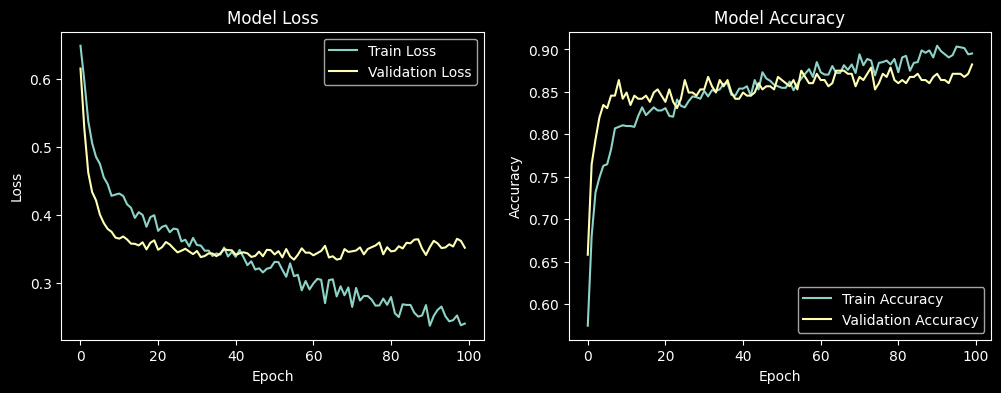

In [90]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)  
y_pred_classes = (y_pred_prob > 0.5).astype(int) 
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
test_precision = precision_score(y_test, y_pred_classes)
test_recall = recall_score(y_test, y_pred_classes)
test_f1 = f1_score(y_test, y_pred_classes)
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
# Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score (Test): {roc_auc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Loss: 0.353
Test Accuracy: 0.862
Test Precision: 0.858
Test Recall: 0.882
Test F1 Score: 0.870
ROC AUC Score (Test): 0.9284


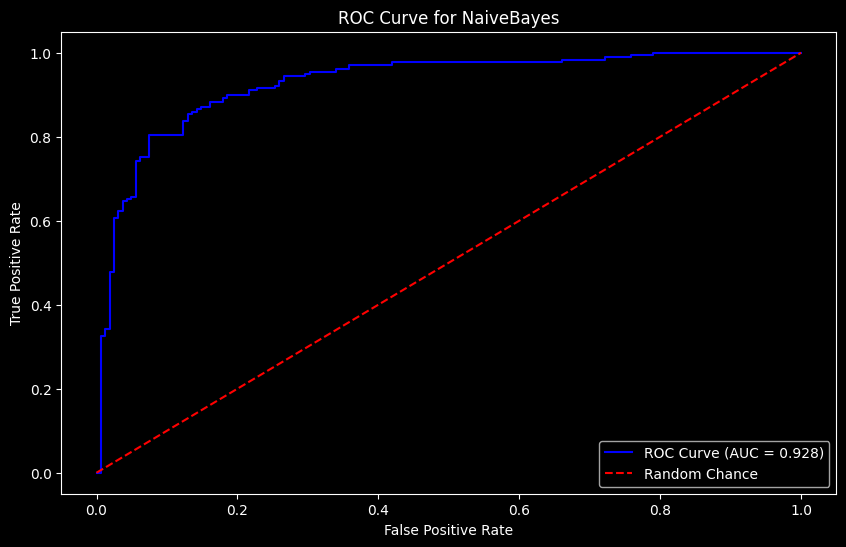

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc='lower right')
plt.show()

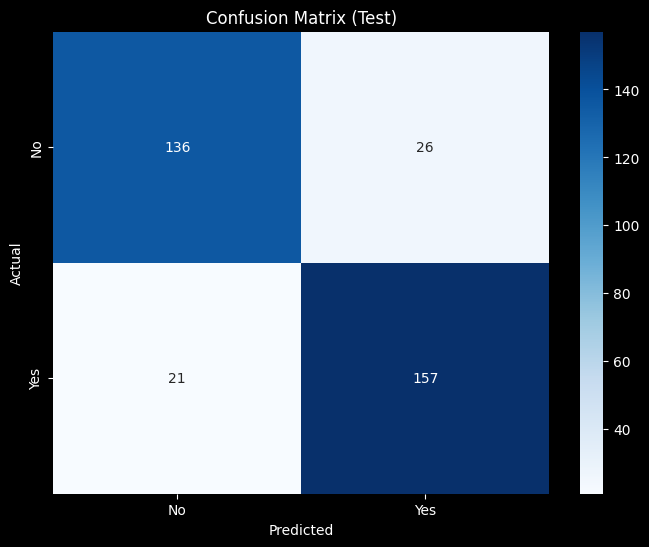

array([[136,  26],
       [ 21, 157]])

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
conf_matrix

In [94]:
class_report = classification_report(y_test, y_pred_classes, target_names=['No', 'Yes'])
print("Classification Report (Test):")
print(class_report)

Classification Report (Test):
              precision    recall  f1-score   support

          No       0.87      0.84      0.85       162
         Yes       0.86      0.88      0.87       178

    accuracy                           0.86       340
   macro avg       0.86      0.86      0.86       340
weighted avg       0.86      0.86      0.86       340

